# FEATURISATION & MODEL TUNING PROJECT

In [7]:
print('-' * 50)
print('1. Import and understand the data')
print('-' * 50)

--------------------------------------------------
1. Import and understand the data
--------------------------------------------------


1. A. Import ‘signal-data.csv’ as DataFrame


In [9]:
import pandas as pd
import numpy as np

sigdat=pd.read_csv("signal-data.csv")

In [1785]:
sigdat # Original data before imputing missing or null values, normalising, etc..

Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     584  \
0     100.0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   
1     100.0  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   
2     100.0   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   
3     100.0  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   
4     100.0  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045   
...     ...       ...     ...     ...  ...       ...     ...     ...     ...   
1562  100.0   82.2467  0.1248  1.3424  ...  203.1720  0.4988  0.0143  0.0039   
1563  100.0   98.4689  0.1205  1.4333  ...       NaN  0.4975  0.0131  0.0036   
1564  100.0   99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0   98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0   85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

          585     586     587     588       589  Pass/Fail  
0      2.3630     NaN     NaN     NaN       NaN         -1  
1      4.4447  0.0096  0.0201  0.0060  208.2045         -1  
2      3.1745  0.0584  0.0484  0.0148   82.8602          1  
3      2.0544  0.0202  0.0149  0.0044   73.8432         -1  
4     99.3032  0.0202  0.0149  0.0044   73.8432         -1  
...       ...     ...     ...     ...       ...        ...  
1562   2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563   2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564   3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565   3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566   3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[1567 rows x 592 columns]

1.B. Print 5 point summary and share at least 2 observations.

In [11]:
sigdat.describe().T

count         mean         std        min          25%        50%  \
0          1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.4900   
1          1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.4050   
2          1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.0667   
3          1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.2144   
4          1553.0     4.197013   56.355540     0.6815     1.017700     1.3168   
...           ...          ...         ...        ...          ...        ...   
586        1566.0     0.021458    0.012358    -0.0169     0.013425     0.0205   
587        1566.0     0.016475    0.008808     0.0032     0.010600     0.0148   
588        1566.0     0.005283    0.002867     0.0010     0.003300     0.0046   
589        1566.0    99.670066   93.891919     0.0000    44.368600    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.000000    -1.0000   

                 75%        max  
0          3056.6500  3356.3500  
1          2538.8225  2846.4400  
2          2218.0555  2315.2667  
3          1591.2235  3715.0417  
4             1.5257  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[591 rows x 8 columns]

In [12]:
sigdat.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [13]:
sigdat.tail()

Time        0        1          2          3       4  \
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5        6       7       8  ...       581     582     583     584  \
1562  100.0  82.2467  0.1248  1.3424  ...  203.1720  0.4988  0.0143  0.0039   
1563  100.0  98.4689  0.1205  1.4333  ...       NaN  0.4975  0.0131  0.0036   
1564  100.0  99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0  98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0  85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

         585     586     587     588       589  Pass/Fail  
1562  2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563  2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564  3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565  3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566  3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[5 rows x 592 columns]

In [14]:
sigdat.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

Answer:-

Observations from 5 point summary:

    Data has 591 columns!, need to find possibilities to reduce the dimensions wherver possible
    
    Last column is target columsn pass/fail
    
    Lot of null values are found which needs to be imputed and respective columns to be removed
    
    Some of the data is found skewed from the mean and hence this could be normalised/standardised

In [15]:
print('-' * 50)
print('2. Data cleansing')
print('-' * 50)

--------------------------------------------------
2. Data cleansing
--------------------------------------------------


2. A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [1787]:
sigdat.shape

(1567, 592)

In [1788]:
sigdat.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [1789]:
sgdt=pd.DataFrame(sigdat,columns=sigdat.columns)
#sgdt.drop(['Time','Pass/Fail'],axis=1,inplace=True)
sgdt.drop('Time',axis=1,inplace=True)
sgdt.shape

(1567, 591)

In [1790]:
sgdt.isnull().sum()/len(sgdt)*100

0            0.382897
1            0.446713
2            0.893427
3            0.893427
4            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 591, dtype: float64

In [1791]:
l=round(((sgdt.isnull().sum() / len(sgdt))*100).sort_values(ascending=False),0)
l

157          91.0
292          91.0
293          91.0
158          91.0
492          86.0
             ... 
120           0.0
156           0.0
495           0.0
494           0.0
Pass/Fail     0.0
Length: 591, dtype: float64

In [1792]:
l1=[]
l1=l[l>20].index
l2=[]
l2=l[l<20].index

for i in l1:
    sgdt.drop(columns=i,axis=1,inplace=True) # Dropping columns having more than 20% null values
    for i in l2:
        sgdt[i] = sgdt[i].fillna(value=sgdt[i].mean()) #Replacing with mean the columns having less than 20% null values
sgdt

0        1          2          3       4      5         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.1235   

             8         9  ...      577     582     583     584      585  \
0     1.500500  0.016200  ...  14.9509  0.5005  0.0118  0.0035   2.3630   
1     1.496600 -0.000500  ...  10.9003  0.5019  0.0223  0.0055   4.4447   
2     1.443600  0.004100  ...   9.2721  0.4958  0.0157  0.0039   3.1745   
3     1.488200 -0.012400  ...   8.5831  0.4990  0.0103  0.0025   2.0544   
4     1.503100 -0.003100  ...  10.9698  0.4800  0.4766  0.1045  99.3032   
...        ...       ...  ...      ...     ...     ...     ...      ...   
1562  1.342400 -0.004500  ...  11.7256  0.4988  0.0143  0.0039   2.8669   
1563  1.433300 -0.006100  ...  17.8379  0.4975  0.0131  0.0036   2.6238   
1564  1.462862 -0.000841  ...  17.7267  0.4987  0.0153  0.0041   3.0590   
1565  1.462200 -0.007200  ...  19.2104  0.5004  0.0178  0.0038   3.5662   
1566  1.462862 -0.000841  ...  22.9183  0.4987  0.0181  0.0040   3.6275   

           586       587       588         589  Pass/Fail  
0     0.021458  0.016475  0.005283   99.670066         -1  
1     0.009600  0.020100  0.006000  208.204500         -1  
2     0.058400  0.048400  0.014800   82.860200          1  
3     0.020200  0.014900  0.004400   73.843200         -1  
4     0.020200  0.014900  0.004400   73.843200         -1  
...        ...       ...       ...         ...        ...  
1562  0.006800  0.013800  0.004700  203.172000         -1  
1563  0.006800  0.013800  0.004700  203.172000         -1  
1564  0.019700  0.008600  0.002500   43.523100         -1  
1565  0.026200  0.024500  0.007500   93.494100         -1  
1566  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 559 columns]

2.B. Identify and drop the features which are having same value for all the rows

In [1793]:
nunique = sgdt.nunique()
cols_to_drop = nunique[nunique == 1].index
sgdt.drop(cols_to_drop, axis=1,inplace=True)
sgdt

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     583     584  \
0     1.500500  0.016200 -0.003400  ...  14.9509  0.5005  0.0118  0.0035   
1     1.496600 -0.000500 -0.014800  ...  10.9003  0.5019  0.0223  0.0055   
2     1.443600  0.004100  0.001300  ...   9.2721  0.4958  0.0157  0.0039   
3     1.488200 -0.012400 -0.003300  ...   8.5831  0.4990  0.0103  0.0025   
4     1.503100 -0.003100 -0.007200  ...  10.9698  0.4800  0.4766  0.1045   
...        ...       ...       ...  ...      ...     ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  11.7256  0.4988  0.0143  0.0039   
1563  1.433300 -0.006100 -0.009300  ...  17.8379  0.4975  0.0131  0.0036   
1564  1.462862 -0.000841  0.000146  ...  17.7267  0.4987  0.0153  0.0041   
1565  1.462200 -0.007200  0.003200  ...  19.2104  0.5004  0.0178  0.0038   
1566  1.462862 -0.000841  0.000146  ...  22.9183  0.4987  0.0181  0.0040   

          585       586       587       588         589  Pass/Fail  
0      2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1      4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2      3.1745  0.058400  0.048400  0.014800   82.860200          1  
3      2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...       ...       ...       ...       ...         ...        ...  
1562   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 443 columns]

Answer: After dropping rows having same values, the number of features reduced from 559 to 443

2.C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [1794]:
sgdt.describe().T

count         mean         std        min         25%        50%  \
0          1567.0  3014.452896   73.480613  2743.2400  2966.66500  3011.8400   
1          1567.0  2495.850231   80.227793  2158.7500  2452.88500  2498.9100   
2          1567.0  2200.547318   29.380932  2060.6600  2181.09995  2200.9556   
3          1567.0  1396.376627  439.712852     0.0000  1083.88580  1287.3538   
4          1567.0     4.197013   56.103066     0.6815     1.01770     1.3171   
...           ...          ...         ...        ...         ...        ...   
586        1567.0     0.021458    0.012354    -0.0169     0.01345     0.0205   
587        1567.0     0.016475    0.008805     0.0032     0.01060     0.0148   
588        1567.0     0.005283    0.002866     0.0010     0.00330     0.0046   
589        1567.0    99.670066   93.861936     0.0000    44.36860    72.0230   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.00000    -1.0000   

                 75%        max  
0          3056.5400  3356.3500  
1          2538.7450  2846.4400  
2          2218.0555  2315.2667  
3          1590.1699  3715.0417  
4             1.5296  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[443 rows x 8 columns]

In [1797]:
sgdt.skew().sort_values(ascending=False)

209    39.585205
74     39.585205
478    39.585205
342    39.585205
347    39.585205
         ...    
570    -8.658927
19     -9.862255
11    -10.221613
7     -12.951734
17    -22.191121
Length: 443, dtype: float64

In [1115]:
sgdt.isnull().values.any()

False

In [1796]:
sgdt.dropna()

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     583     584  \
0     1.500500  0.016200 -0.003400  ...  14.9509  0.5005  0.0118  0.0035   
1     1.496600 -0.000500 -0.014800  ...  10.9003  0.5019  0.0223  0.0055   
2     1.443600  0.004100  0.001300  ...   9.2721  0.4958  0.0157  0.0039   
3     1.488200 -0.012400 -0.003300  ...   8.5831  0.4990  0.0103  0.0025   
4     1.503100 -0.003100 -0.007200  ...  10.9698  0.4800  0.4766  0.1045   
...        ...       ...       ...  ...      ...     ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  11.7256  0.4988  0.0143  0.0039   
1563  1.433300 -0.006100 -0.009300  ...  17.8379  0.4975  0.0131  0.0036   
1564  1.462862 -0.000841  0.000146  ...  17.7267  0.4987  0.0153  0.0041   
1565  1.462200 -0.007200  0.003200  ...  19.2104  0.5004  0.0178  0.0038   
1566  1.462862 -0.000841  0.000146  ...  22.9183  0.4987  0.0181  0.0040   

          585       586       587       588         589  Pass/Fail  
0      2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1      4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2      3.1745  0.058400  0.048400  0.014800   82.860200          1  
3      2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...       ...       ...       ...       ...         ...        ...  
1562   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 443 columns]

After reviewing the columns, there is no null values found.

Also, no null values have been found in the rows

Data has skewness which needs to be approached through normalization/standardistion or other techniques

2. D. Check for multi-collinearity in the data and take necessary action

In [1160]:
sgdt.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=443)

In [1161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
x=sgdt
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

F:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


       feature            VIF
0            0   24224.261955
1            1    9573.505757
2            2  154511.611950
3            3     127.670372
4            4   42515.862131
..         ...            ...
438        586       9.795320
439        587     131.328484
440        588     125.402951
441        589       5.847050
442  Pass/Fail       6.802800

[443 rows x 2 columns]


In [1220]:
vif_data.sort_values(by=['VIF'],ascending=False).tail(50)

feature        VIF
293        368  24.094647
312        413  23.800504
231        290  21.652993
363        476  19.211641
292        367  18.451184
38          40  16.396118
335        438  15.199802
21          23  12.935773
90         100  12.806275
385        510  12.295690
438        586   9.795320
91         101   8.693888
54          59   8.238219
442  Pass/Fail   6.802800
441        589   5.847050
68          76   5.303094
39          41   5.227125
73          81   5.028338
374        488   4.901129
115        129   4.267225
70          78   4.078123
375        489   3.703379
369        483   3.680131
329        432   3.250115
370        484   3.195154
330        433   3.161848
368        482   3.136581
316        418   3.098537
372        486   3.070015
72          80   3.001442
355        468   2.999799
86          95   2.991124
371        485   2.982016
373        487   2.900275
71          79   2.749183
317        419   2.705451
82          91   2.679474
388        521   2.575708
383        499   2.430081
386        511   2.359703
92         102   2.312916
384        500   2.292885
67          75   2.192346
69          77   2.127772
97         107   2.053745
74          82   2.037050
98         108   1.908822
8            9   1.743009
9           10   1.631225
22          24   1.579550

In [1802]:
vd=vif_data.sort_values(by=['VIF'],ascending=False).tail(40) # listing only features having variable inflation factor < 10

In [1818]:
vd

feature       VIF
438        586  9.795320
91         101  8.693888
54          59  8.238219
442  Pass/Fail  6.802800
441        589  5.847050
68          76  5.303094
39          41  5.227125
73          81  5.028338
374        488  4.901129
115        129  4.267225
70          78  4.078123
375        489  3.703379
369        483  3.680131
329        432  3.250115
370        484  3.195154
330        433  3.161848
368        482  3.136581
316        418  3.098537
372        486  3.070015
72          80  3.001442
355        468  2.999799
86          95  2.991124
371        485  2.982016
373        487  2.900275
71          79  2.749183
317        419  2.705451
82          91  2.679474
388        521  2.575708
383        499  2.430081
386        511  2.359703
92         102  2.312916
384        500  2.292885
67          75  2.192346
69          77  2.127772
97         107  2.053745
74          82  2.037050
98         108  1.908822
8            9  1.743009
9           10  1.631225
22          24  1.579550

In [1819]:
vd_df=pd.DataFrame(vd,columns=['feature','VIF'])

In [1820]:
vd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 438 to 22
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  40 non-null     object 
 1   VIF      40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


In [1821]:
vd_df.shape

(40, 2)

Creating list of coulmns which has low multicollinearity. This reduces features from 443 to 39

In [1832]:
retained_cols = ['586','101','59','589','76','41','81','488','129','78','489','483','432','484','433','482','418','486',
               '80','468','95','485','487','79','419','91','521','499','511','102','500','75','77','107','82','108','9','10','24']

In [1833]:
sgdt.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=443)

In [1839]:
sgdt_mod=sgdt[['586','101','59','589','76','41','81','488','129','78','489','483','432','484','433','482','418','486',
               '80','468','95','485','487','79','419','91','521','499','511','102','500','75','77','107','82','108','9','10','24']]

In [1840]:
sgdt_mod

586     101       59         589       76     41        81  \
0     0.021458  0.0002  -1.7264   99.670066 -0.02060  4.515 -0.056700   
1     0.009600 -0.0004   0.8073  208.204500 -0.01980  2.773 -0.037700   
2     0.058400 -0.0001  23.8245   82.860200 -0.03260  5.434 -0.018200   
3     0.020200  0.0000  24.3791   73.843200 -0.04610  1.279  0.002800   
4     0.020200 -0.0003 -12.2945   73.843200  0.01830  2.209 -0.012300   
...        ...     ...      ...         ...      ...    ...       ...   
1562  0.006800  0.0000   2.8182  203.172000 -0.02939  1.427 -0.021153   
1563  0.006800  0.0002  -3.3555  203.172000 -0.02939  2.945 -0.021153   
1564  0.019700 -0.0002   1.1664   43.523100 -0.02939  2.863 -0.021153   
1565  0.026200  0.0000   4.4682   93.494100 -0.02939  2.067 -0.021153   
1566  0.011700  0.0000   1.8718  137.784400 -0.02939  2.741 -0.021153   

             488       129        78  ...     102       500        75  \
0      53.109800 -0.047300 -0.030700  ...  0.1350    0.0000  0.012600   
1     194.437100 -0.094600 -0.044000  ... -0.0752    0.0000 -0.003900   
2     191.758200 -0.189200  0.021300  ...  0.0134    0.0000 -0.007800   
3       0.000000  0.283800  0.040000  ... -0.0699  711.6418 -0.055500   
4     748.178100 -0.567700 -0.044900  ...  0.0696    0.0000 -0.053400   
...          ...       ...       ...  ...     ...       ...       ...   
1562  352.616477  0.000000 -0.013643  ... -0.0988    0.0000 -0.006903   
1563  352.616477 -0.141900 -0.013643  ...  0.0855  874.5098 -0.006903   
1564  352.616477 -0.554228 -0.013643  ...  0.0022    0.0000 -0.006903   
1565  352.616477 -0.993400 -0.013643  ... -0.1165  433.3952 -0.006903   
1566  352.616477 -0.554228 -0.013643  ... -0.1077    0.0000 -0.006903   

            77     107        82     108         9        10       24  
0     0.014100 -0.2468 -0.004400  0.3196  0.016200 -0.003400   751.00  
1     0.000400  0.0772  0.001700 -0.0903 -0.000500 -0.014800 -1640.25  
2    -0.005200 -0.0301  0.028700 -0.0728  0.004100  0.001300 -1916.50  
3    -0.040000 -0.0483  0.027700 -0.1180 -0.012400 -0.003300 -1657.25  
4    -0.016700 -0.0799 -0.004800 -0.2038 -0.003100 -0.007200   117.00  
...        ...     ...       ...     ...       ...       ...      ...  
1562 -0.007041 -0.0373  0.006055 -0.1257 -0.004500 -0.005700   356.00  
1563 -0.007041  0.0350  0.006055 -0.0290 -0.006100 -0.009300   339.00  
1564 -0.007041 -0.0978  0.006055  0.0486 -0.000841  0.000146 -1226.00  
1565 -0.007041  0.1368  0.006055 -0.0219 -0.007200  0.003200   394.75  
1566 -0.007041  0.0521  0.006055 -0.0786 -0.000841  0.000146  -425.00  

[1567 rows x 39 columns]

Answer : Reducing features having multicollinearity factor (VIF) greater than 10. This helps is feature redcution from 
    443 to 39. 

2.E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions

In [1843]:
sgdt_mod.describe().T

count        mean          std         min         25%         50%  \
586  1567.0    0.021458     0.012354     -0.0169     0.01345    0.020500   
101  1567.0   -0.000007     0.000220     -0.0024    -0.00010    0.000000   
59   1567.0    2.960241     9.510891    -28.9882    -1.85545    0.973600   
589  1567.0   99.670066    93.861936      0.0000    44.36860   72.023000   
76   1567.0   -0.029390     0.032948     -0.1862    -0.05135   -0.029390   
41   1567.0    3.353066     2.342268     -0.0759     2.69900    3.080000   
81   1567.0   -0.021153     0.016890     -0.0982    -0.02710   -0.019900   
488  1567.0  352.616477   250.104924      0.0000   145.15685  352.511400   
129  1567.0   -0.554228     1.216967     -3.7790    -0.89880   -0.141900   
78   1567.0   -0.013643     0.047504     -0.3482    -0.04730   -0.013643   
489  1567.0  272.169707   226.292471      0.0000   113.80665  221.507500   
483  1567.0  206.564196   191.380818      0.0000    82.41015  150.880100   
432  1567.0   99.367633   126.108109      0.0000    31.03385   58.287600   
484  1567.0  215.288948   211.487178      0.0000    77.01180  142.526200   
433  1567.0  205.519304   225.634649      0.0000    10.04745  151.168700   
482  1567.0  318.418448   278.849666      0.0000     0.00000  298.425400   
418  1567.0  320.259235   287.520704      0.0000     0.00000  302.310800   
486  1567.0  302.506186   285.153545      0.0000     0.00000  260.141800   
80   1567.0   -0.018531     0.048847     -0.1437    -0.04295   -0.009300   
468  1567.0  224.173047   230.250575      0.0000    38.88265  151.147200   
95   1567.0    0.000060     0.000104     -0.0009     0.00000    0.000000   
485  1567.0  201.111728   217.007760      0.0000    51.18850  115.891900   
487  1567.0  239.455326   261.808095      0.0000    57.31690  114.596600   
79   1567.0    0.003458     0.022902     -0.0568    -0.01070    0.000800   
419  1567.0  309.061299   325.240503      0.0000     0.00000  272.891600   
91   1567.0    0.002440     0.087515     -0.3570    -0.04265    0.000100   
521  1567.0   11.610080   103.122996      0.0000     0.00000    0.000000   
499  1567.0  263.195864   324.563886      0.0000     0.00000    0.000000   
511  1567.0  275.979457   329.454099      0.0000     0.00000    0.000000   
102  1567.0    0.001115     0.062847     -0.5353    -0.03530    0.000000   
500  1567.0  240.981377   322.797084      0.0000     0.00000    0.000000   
75   1567.0   -0.006903     0.022121     -0.1049    -0.01920   -0.006600   
77   1567.0   -0.007041     0.031127     -0.1046    -0.02940   -0.009400   
107  1567.0   -0.001766     0.087307     -0.5226    -0.04835    0.000000   
82   1567.0    0.006055     0.035797     -0.2129    -0.01735    0.006700   
108  1567.0   -0.010789     0.086591     -0.3454    -0.06440   -0.010789   
9    1567.0   -0.000841     0.015107     -0.0534    -0.01080   -0.001300   
10   1567.0    0.000146     0.009296     -0.0349    -0.00560    0.000400   
24   1567.0 -298.598136  2900.835956 -14804.5000 -1474.37500  -80.500000   

            75%         max  
586     0.02760      0.1028  
101     0.00010      0.0017  
59      4.33770    168.1455  
589   114.74970    737.3048  
76     -0.00690      0.0723  
41      3.51500     37.8800  
81     -0.01215      0.0584  
488   507.49705    997.5186  
129     0.04730      2.4580  
78      0.01205      0.2492  
489   372.34190    994.0035  
483   260.07900    989.4737  
432   120.13690    994.2857  
484   288.91845    996.8586  
433   304.54180    995.7447  
482   512.39075    999.4135  
418   523.62445    999.3160  
486   497.38450    999.4911  
80      0.00870      0.1186  
468   334.67400    999.8770  
95      0.00010      0.0009  
485   283.28900    994.0000  
487   391.27750    995.7447  
79      0.01280      0.1013  
419   582.80310    998.6813  
91      0.05035      0.3627  
521     0.00000   1000.0000  
499   536.12260   1000.0000  
511   554.01070   1000.0000  
102     0.03360      0.2979  
500   505.22575    999.2337  
75   

In [1844]:
sgdt_mod.skew()

586     1.438483
101    -0.276339
59      4.730023
589     2.715340
76     -0.195524
41     12.307135
81     -0.685258
488     0.356705
129    -0.979244
78      0.176220
489     1.047157
483     1.714218
432     3.346368
484     1.534042
433     1.364392
482     0.469546
418     0.456661
486     0.615203
80     -0.185203
468     1.262658
95      0.127172
485     1.524456
487     1.160917
79      1.005622
419     0.499839
91     -0.138299
521     9.040238
499     0.743494
511     0.700040
102    -0.206321
500     0.920019
75      0.388149
77      0.594708
107    -0.280079
82      0.234897
108     0.413221
9       0.331433
10      0.057724
24     -0.054125
dtype: float64

In [1845]:
sgdt_mod.skew().max()

12.307134774987382

Scaling the data using z score to reduce skewness

In [1846]:
from scipy import stats
import numpy as np
zs = np.abs(stats.zscore(sgdt_mod))   # get the z-score of every value with respect to their columns
print(zs)

               586       101        59           589            76        41  \
0     2.528283e-15  0.940846  0.492923  1.665950e-15  2.668846e-01  0.496231   
1     9.601744e-01  1.783099  0.226438  1.156689e+00  2.911732e-01  0.247731   
2     2.991151e+00  0.421127  2.194423  1.791486e-01  9.744338e-02  0.888711   
3     1.018947e-01  0.032864  2.252754  2.752459e-01  5.073124e-01  0.885778   
4     1.018947e-01  1.329109  1.604435  2.752459e-01  1.447915e+00  0.488600   
...            ...       ...       ...           ...           ...       ...   
1562  1.186890e+00  0.032864  0.014939  1.103056e+00  1.369351e-15  0.822571   
1563  1.186890e+00  0.940846  0.664266  1.103056e+00  1.369351e-15  0.174274   
1564  1.423796e-01  0.875118  0.188669  5.983777e-01  1.369351e-15  0.209294   
1565  3.839239e-01  0.032864  0.158601  6.581942e-02  1.369351e-15  0.549244   
1566  7.901378e-01  0.032864  0.114478  4.061977e-01  1.369351e-15  0.261397   

                81           488       

In [1847]:
zs.skew()

586     3.279545
101     4.496626
59      7.872858
589     3.787053
76      1.129683
41     14.059399
81      1.798581
488     0.561505
129     1.262132
78      1.706720
489     1.321337
483     2.270203
432     4.549288
484     2.035088
433     1.821804
482     0.386256
418     0.362152
486     0.549945
80      0.768367
468     1.730145
95      4.790754
485     2.004414
487     1.491984
79      1.695225
419     0.287554
91      1.538827
521     9.060519
499     1.019991
511     0.804458
102     2.861961
500     1.276444
75      3.636987
77      1.171073
107     2.098027
82      1.836344
108     1.756800
9       1.375009
10      1.696915
24      2.193410
dtype: float64

In [1848]:
zs.skew().max()

14.059398647888983

After scaling, no significant changes in skewness. however, the data is not much skewed except sensor data 41.
We still retain sensor data 41 and use for the analysis as this has low collinearity

In [1849]:
threshold = 3
np.where(zs > threshold)

(array([   0,    0,    8,    9,   16,   17,   21,   21,   23,   27,   28,
          30,   31,   34,   40,   40,   43,   43,   48,   56,   57,   57,
          58,   60,   60,   63,   63,   64,   65,   66,   68,   68,   69,
          69,   73,   73,   76,   78,   78,   79,   81,   81,   84,   84,
          88,   89,   91,   92,   95,   97,   97,   98,   99,  100,  100,
         101,  102,  102,  103,  103,  104,  107,  107,  107,  107,  109,
         110,  112,  112,  112,  116,  118,  131,  136,  139,  144,  145,
         146,  147,  148,  151,  153,  153,  169,  169,  172,  173,  173,
         185,  188,  189,  190,  193,  193,  194,  199,  207,  220,  228,
         231,  240,  242,  245,  246,  258,  259,  266,  271,  272,  273,
         273,  274,  275,  282,  283,  283,  285,  290,  292,  294,  298,
         299,  304,  308,  316,  316,  317,  325,  327,  329,  335,  340,
         340,  341,  342,  363,  365,  366,  367,  367,  368,  369,  369,
         375,  376,  376,  378,  379, 

Data cleaning done for proceeding to modelling:

    1. Null values identified and respective columns were imputed (591 to 559)
    
    2. Null values reviewed for rows and none identified
    
    3. Rows having same values has been identified and respective features removed (559 to 443)
    
    4. Multicollinearity in the data has been reviewed and found majority of them having higher VIF (variation inflation factor)
    
    5.Columns with VIF greater than 10 has been dropped (443 to 39)

In [1854]:
print('-' * 50)
print('3. Data analysis & visualisation:')
print('-' * 50)

--------------------------------------------------
3. Data analysis & visualisation:
--------------------------------------------------


3.A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

In [1855]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

In [1856]:
len(sgdt_mod)

1567

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 2.]]),
 array([-14804.5  , -14515.395, -14226.29 , -13937.185, -13648.08 ,
        -13358.975, -13069.87 , -12780.765, -12491.66 , -12202.555,
        -11913.45 , -11624.345, -11335.24 , -11046.135, -10757.03 ,
        -10467.925, -10178.82 ,  -9889.715,  -9600.61 ,  -9311.505,
         -9022.4  ,  -8733.295,  -8444.19 ,  -8155.085,  -7865.98 ,
         -7576.875,  -7287.77 ,  -6998.665,  -6709.56 ,  -6420.455,
         -6131.35 ,  -5842.245,  -5553.14 ,  -5264.035,  -4974.93 ,
         -4685.825,  -4396.72 ,  -4107.615,  -3818.51 ,  -3529.405,
         -3240.3  ,  -2951.195,  -2662.09 ,  -2372.985,  -2083.88 ,
         -1794.775,  -1505.67 ,  -1216.565,   -927.46 ,   -638.355,
          -349.25 ,    -60.145,    228.96 ,    518.065,    807.17 ,
   

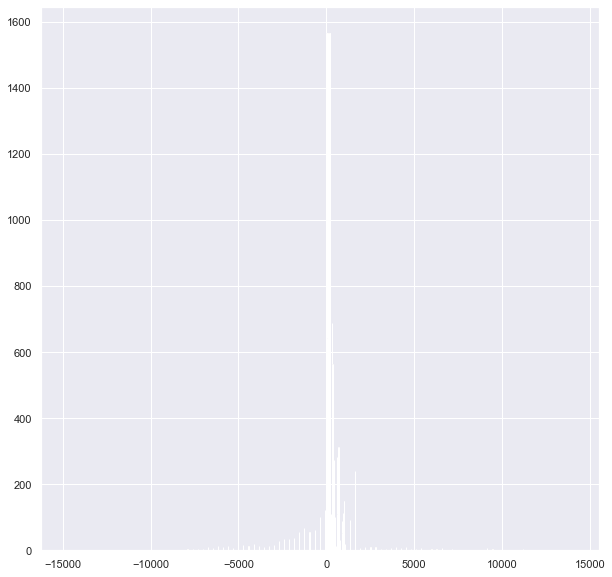

In [1858]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(sgdt_mod, bins=100)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.480450e+04, -1.374955e+04, -1.269460e+04, -1.163965e+04,
        -1.058470e+04, -9.529750e+03, -8.474800e+03, -7.419850e+03,
        -6.364900e+03, -5.309950e+03, -4.255000e+03, -3.200050e+03,
        -2.145100e+03, -1.090150e+03, -3.520000e+01,  1.019750e+03,
         2.074700e+03,  3.129650e+03,  4.184600e+03,  5.239550e+03,
         6.294500e+03,  7.349450e+03,  8.404400e+03,  9.459350e+03,
         1.051430e+04,  1.156925e+04,  1.262420e+04,  1.367915e+04,
         1.473410e+04,  1.578905e+04,  1.684400e+04,  1.789895e+04,
         1.895390e+04,  2.000885e+04,  2.106380e+04,  2.211875e+04,
         2.317370e+04,  2.422865e+04,  2.528360e+04,  2.633855e+04,
         2.739350e+04,  2.844845e+04,  2.950340e+04,  3.055835e+04,
   

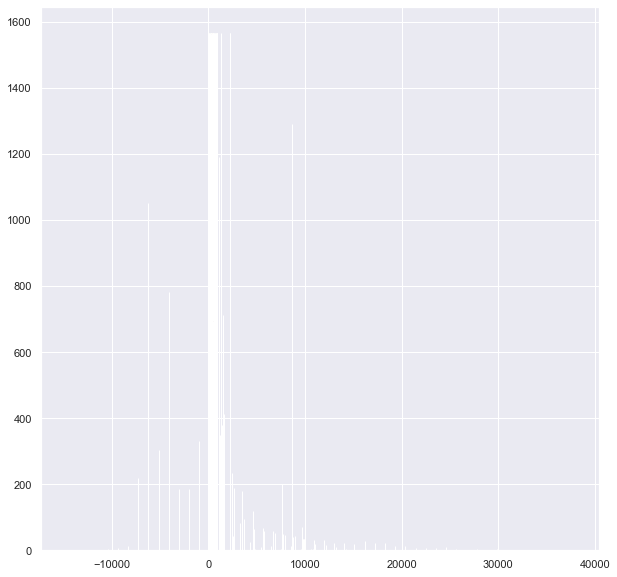

In [1865]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(sgdt, bins=50) #Data before multicollinearity identification

In the above histogram, the first array is the frequency in each class and the second array contains the edges of the class intervals. 
These arrays can be assigned to a variable and used for further analysis - maximum being about 3794

<AxesSubplot:ylabel='Density'>

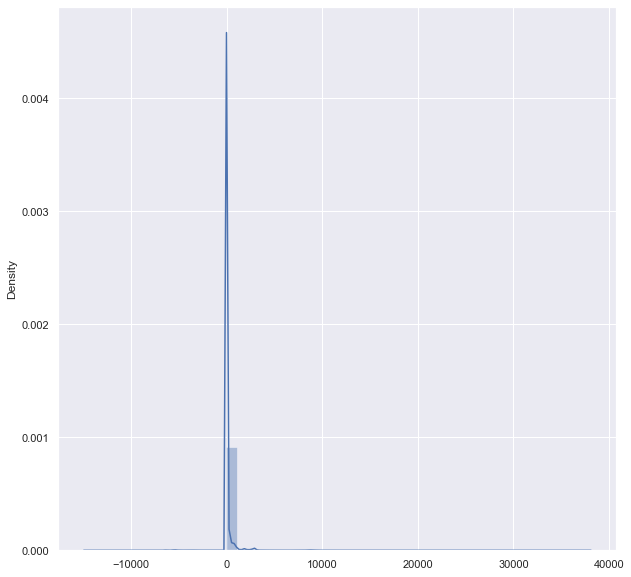

In [1867]:
sns.distplot(sgdt,bins=50) #Data before multicollinearity identification

<AxesSubplot:ylabel='Density'>

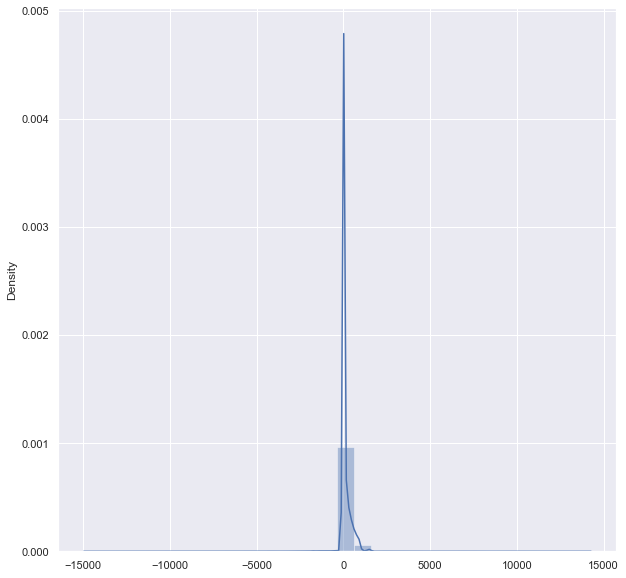

In [1884]:
sns.distplot(sgdt_mod,bins=30) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

<AxesSubplot:ylabel='Density'>

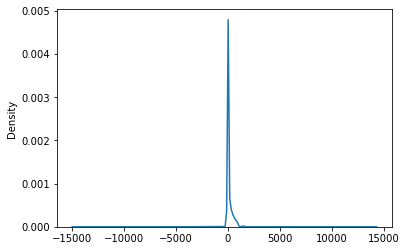

In [1412]:
sns.distplot(sgdt_mod, hist=False) # adding an argument to plot only frequency polygon

Data is concentrated towards center

<AxesSubplot:ylabel='Density'>

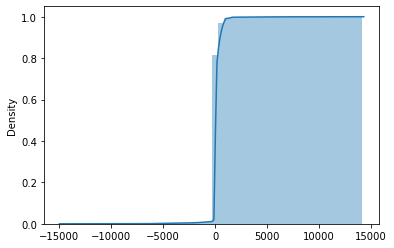

In [1420]:
sns.distplot(sgdt_mod, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

3.B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

Scatter plot using orignal data.

In [1442]:
fig, ax = plt.subplots(figsize=(150, 125))
sns.set(font_scale = 5)
sns.heatmap(sgdt_mod.corr(), annot=True,)  # plot the correlation coefficients as a heatmap

<AxesSubplot:>

In [1437]:
sgdt_mod.corr()

586       101        59       589        76        41        81  \
586  1.000000  0.008266 -0.042800 -0.486559 -0.032273 -0.025716 -0.025926   
101  0.008266  1.000000 -0.032894  0.008976  0.004689 -0.055389 -0.002992   
59  -0.042800 -0.032894  1.000000  0.042628 -0.255929 -0.007074  0.005322   
589 -0.486559  0.008976  0.042628  1.000000  0.056562  0.013800  0.026702   
76  -0.032273  0.004689 -0.255929  0.056562  1.000000 -0.102415 -0.039604   
41  -0.025716 -0.055389 -0.007074  0.013800 -0.102415  1.000000  0.028926   
81  -0.025926 -0.002992  0.005322  0.026702 -0.039604  0.028926  1.000000   
488  0.003155 -0.018579  0.035601 -0.010217 -0.023886  0.013352  0.262958   
129 -0.109010  0.070233  0.190543  0.058813 -0.064432  0.026432 -0.088607   
78   0.116209 -0.080267 -0.279453 -0.082986  0.204563 -0.081467  0.014202   
489  0.001943 -0.038567 -0.021939 -0.007881 -0.047617 -0.036408 -0.019476   
483  0.036579  0.037560 -0.107968  0.013663  0.395283 -0.067691 -0.032840   
432 -0.000622  0.006357  0.013395 -0.016258 -0.032726  0.007761  0.013378   
484  0.008617  0.004791  0.083781 -0.071487 -0.064829  0.012399 -0.050488   
433  0.060151 -0.000747 -0.072867 -0.014079  0.064694 -0.014405 -0.012053   
482 -0.011079 -0.023698 -0.003168 -0.010267 -0.073837  0.003002  0.024956   
418  0.031423 -0.022848 -0.035252  0.009326  0.023802 -0.024632 -0.018315   
486 -0.047074  0.012862 -0.032892  0.034406  0.061449 -0.010845 -0.016470   
80   0.019725 -0.015401 -0.115441  0.046573  0.174687 -0.118412 -0.012913   
468  0.052259  0.014770 -0.220185 -0.020457  0.049345 -0.028943 -0.009266   
95  -0.046034  0.029154  0.110099  0.033154  0.022935 -0.035294 -0.053647   
485  0.057239  0.010956 -0.056382 -0.018679  0.047000 -0.035116 -0.105679   
487  0.015467 -0.036375 -0.133053 -0.012958  0.178076 -0.071966 -0.013242   
79  -0.092492  0.004761  0.348512  0.060681 -0.153050  0.029781 -0.035220   
419 -0.013507  0.000243 -0.037902  0.028031  0.038619  0.032264  0.009964   
91  -0.004124 -0.076788  0.013915  0.024689  0.050781  0.034775 -0.026293   
521  0.018687  0.012580  0.004569  0.033088  0.000897  0.011305  0.004059   
499 -0.016732 -0.011283 -0.070973  0.017603 -0.000903  0.034167 -0.002386   
511 -0.058987 -0.029992  0.047969  0.049598 -0.057205  0.064621 -0.002428   
102  0.009632 -0.015451  0.027063 -0.017915 -0.048488 -0.030040  0.003626   
500  0.013117  0.006854 -0.004101 -0.002092 -0.009537 -0.010555  0.002586   
75  -0.004506  0.012514 -0.217875  0.008004  0.139643  0.024982  0.020453   
77   0.034370  0.025011 -0.031725 -0.026583 -0.026317 -0.012645  0.115475   
107 -0.016667 -0.004502  0.005100  0.021738  0.057445  0.004999  0.028224   
82   0.078711 -0.010595 -0.038501 -0.046346 -0.029568 -0.029425  0.008309   
108  0.033807 -0.020669  0.021823 -0.013624  0.049180  0.016502  0.029267   
9    0.033738 -0.002723 -0.026476  0.004880  0.236932 -0.042435  0.006826   
10   0.000327  0.014526  0.085646  0.008393  0.072108 -0.025927 -0.000388   
24   0.016466  0.042409  0.036681 -0.016735 -0.025389 -0.005596 -0.032900   

          488       129        78  ...       102       500        75  \
586  0.003155 -0.109010  0.116209  ...  0.009632  0.013117 -0.004506   
101 -0.018579  0.070233 -0.080267  ... -0.015451  0.006854  0.012514   
59   0.035601  0.190543 -0.279453  ...  0.027063 -0.004101 -0.217875   
589 -0.010217  0.058813 -0.082986  ... -0.017915 -0.002092  0.008004   
76  -0.023886 -0.064432  0.204563  ... -0.048488 -0.009537  0.139643   
41   0.013352  0.026432 -0.081467  ... -0.030040 -0.010555  0.024982   
81   0.262958 -0.088607  0.014202  ...  0.003626  0.002586  0.020453   
488  1.000000  0.015838 -0.033061  ...  0.025845  0.024815  0.001813   
129  0.015838  1.000000 -0.450183  ...  0.020943 -0.064163 -0.083069   
78  -0.033061 -0.450183  1.000000  ... -0.032349  0.001588  0.150709   
489  0.035072  0.005031  0.050616  ...  0.029921  0.023425  0.033399   
483  0.000902 -0.069206  0.112393  ... -0.006842 -0.005213  0.033

Highest correlation is between sensor datas from 102 and 91 - 56%. The next highest is between sensr data 586 & 589.
Let us plot scatter plot for the same

<AxesSubplot:xlabel='102', ylabel='91'>

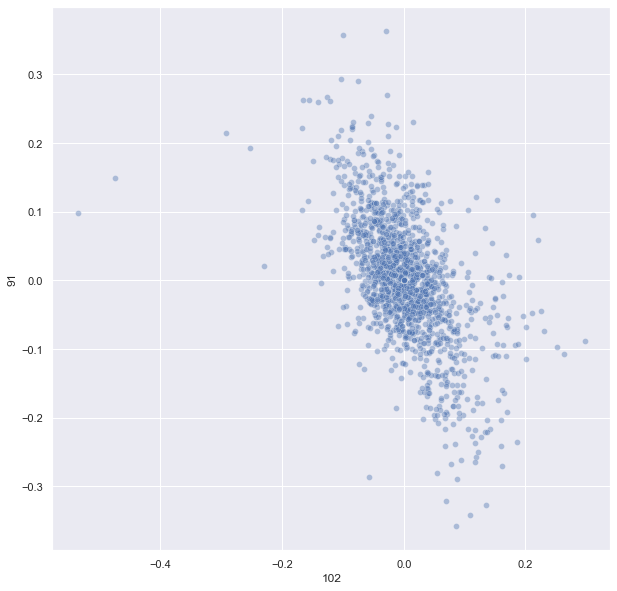

In [1470]:
sns.set( rc = {'figure.figsize' : ( 10, 10 ), 
               'axes.labelsize' : 12 })
sns.scatterplot(x=sgdt_mod['102'], y=sgdt_mod['91'],data=sgdt_mod,sizes = (50, 300),alpha=0.4)  # Plots the scatter plot using two variables


From the above Scatter Plot above,it is observed that the sensor data 91 and 103 are negatively correlated

<AxesSubplot:xlabel='586', ylabel='589'>

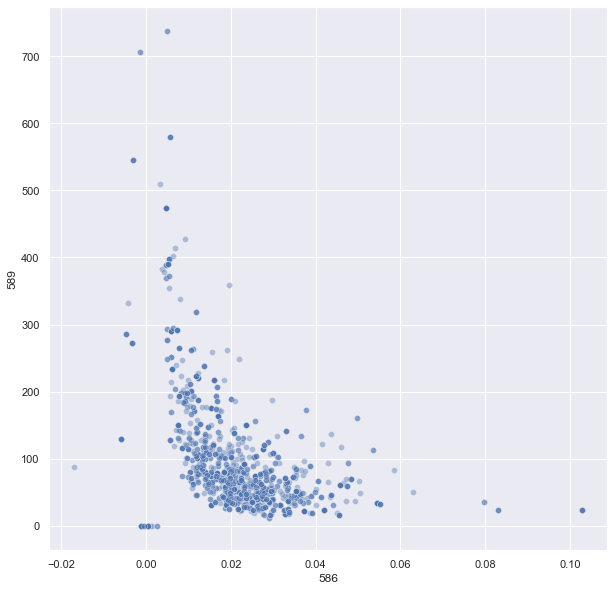

In [1471]:
sns.set( rc = {'figure.figsize' : ( 10, 10 ), 
               'axes.labelsize' : 12 })
sns.scatterplot(x=sgdt_mod['586'], y=sgdt_mod['589'],data=sgdt_mod,sizes = (50, 300),alpha=0.4)  # Plots the scatter plot using two variables


From the above Scatter Plot above, it is observed that the sensor data 589 and 586 are negatively correlated

Scatter plot using scaled data.

<AxesSubplot:>

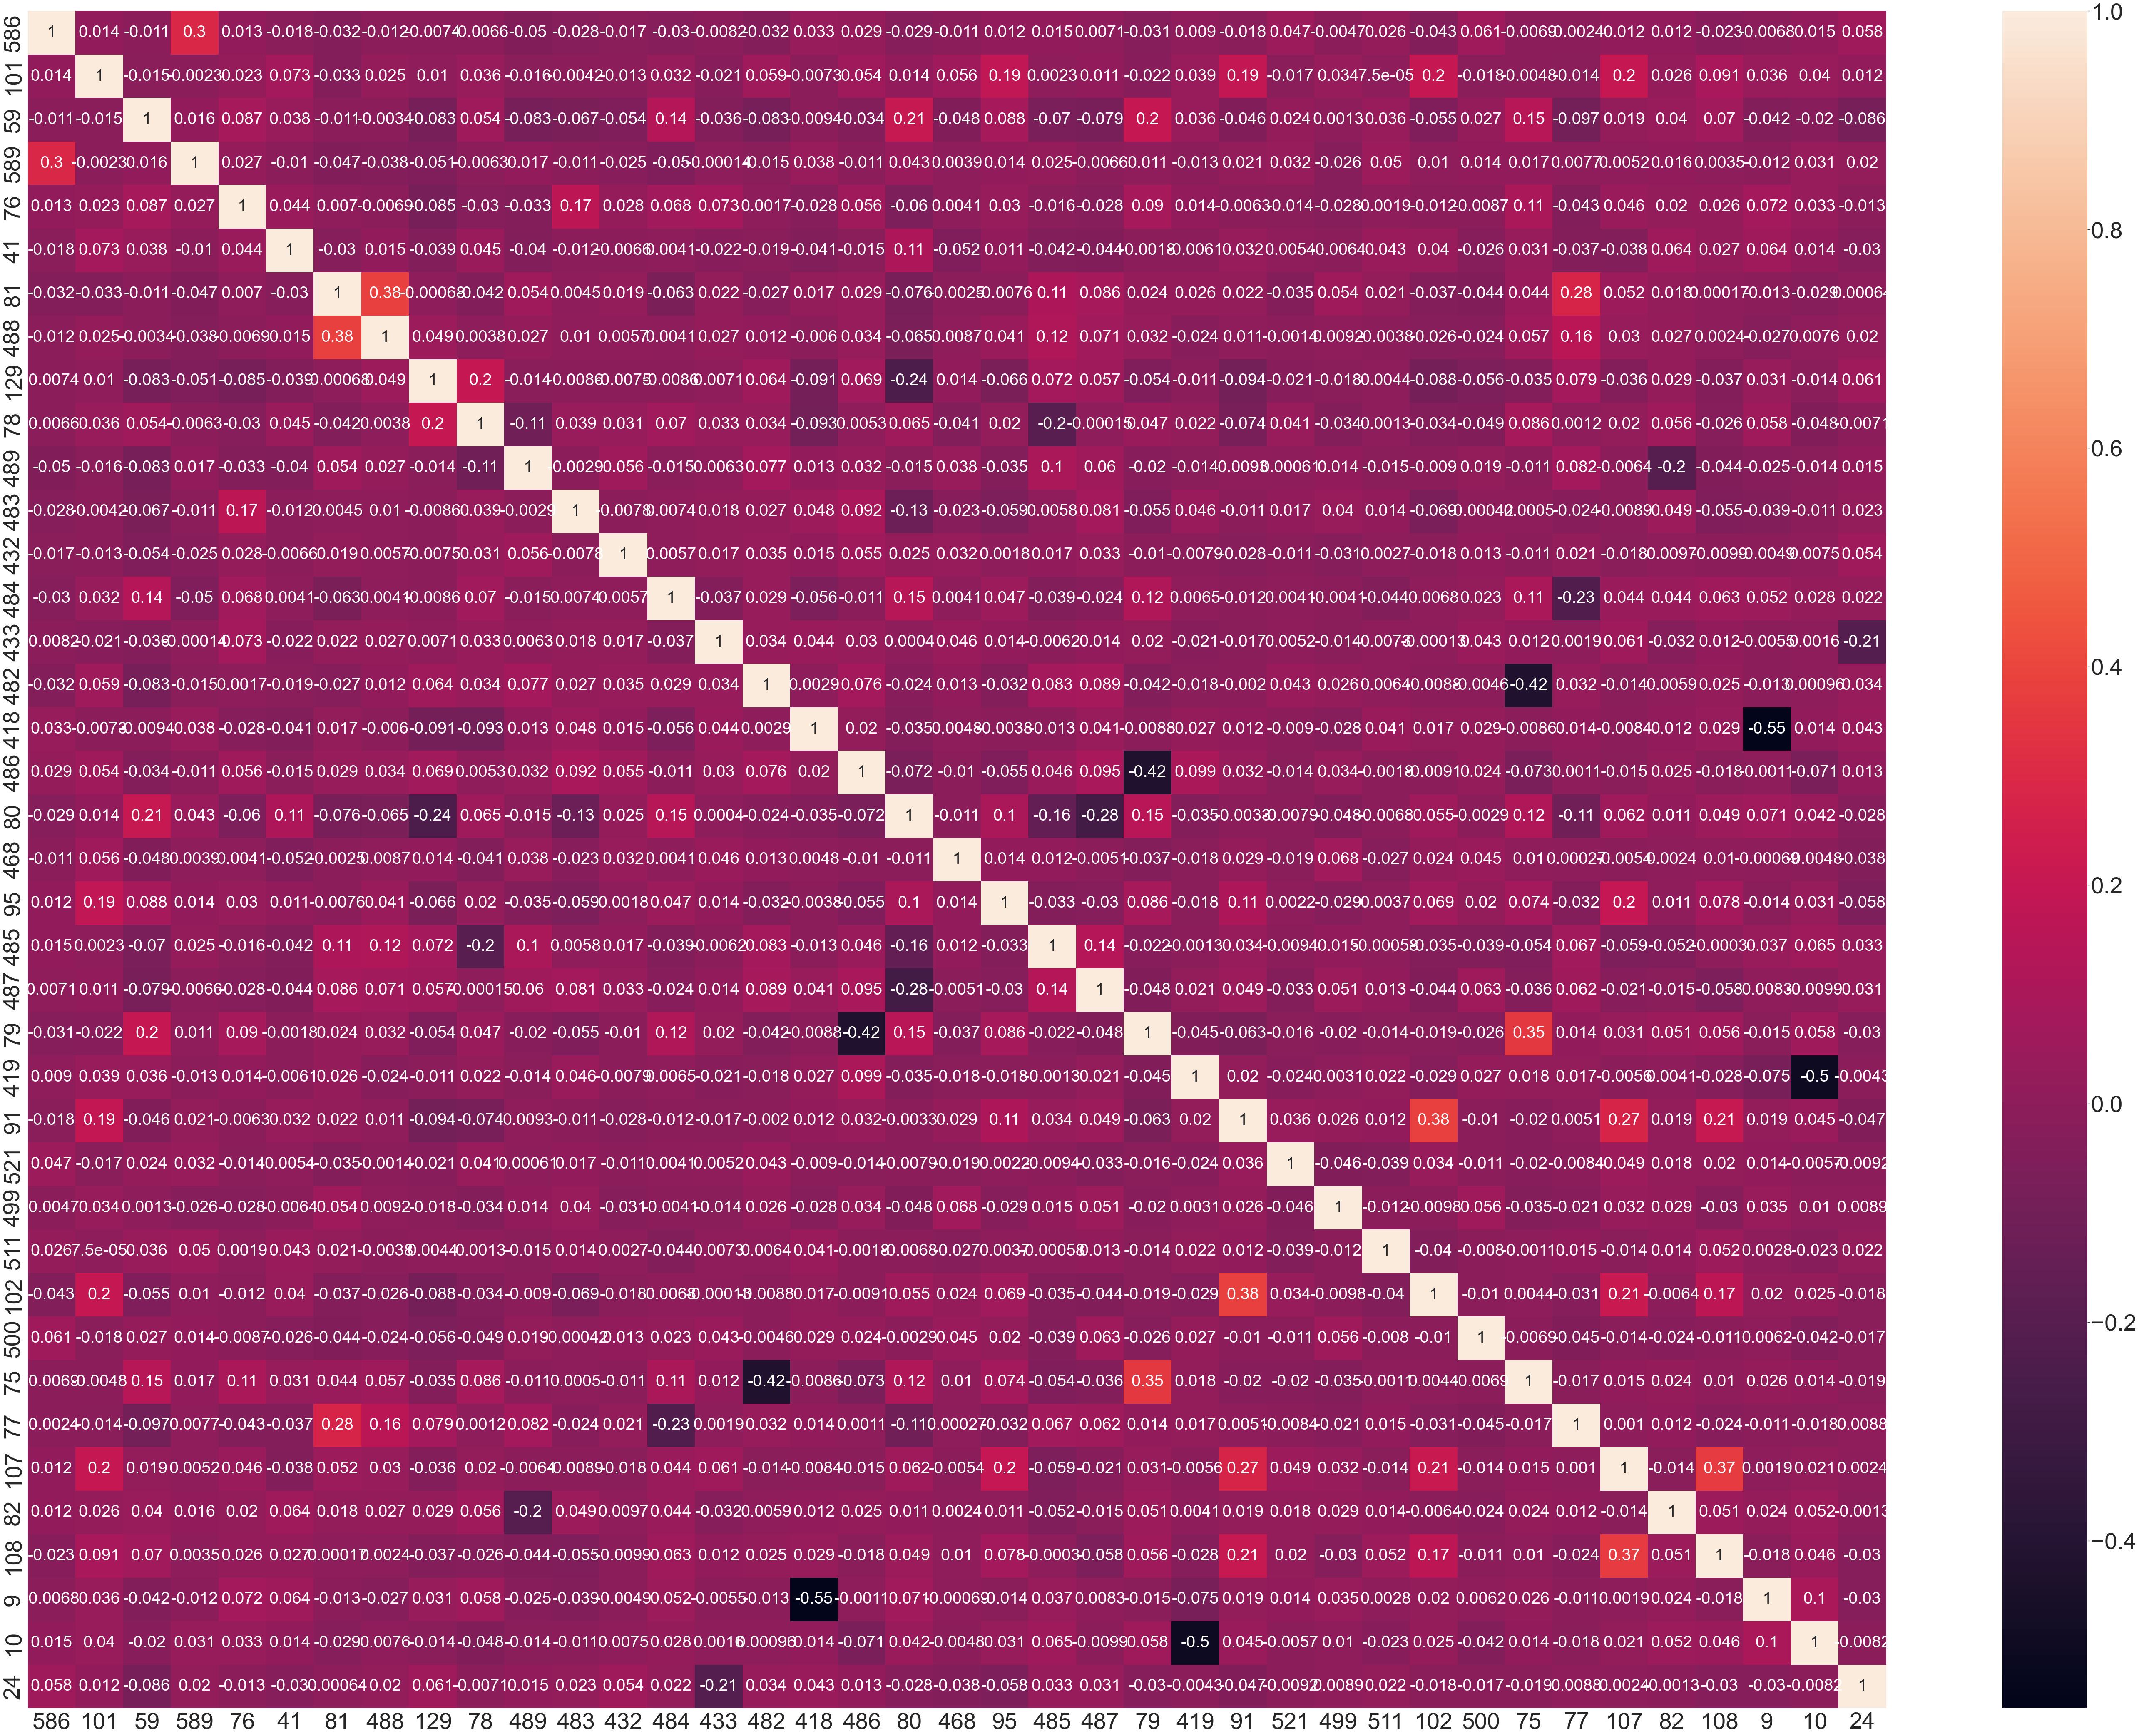

In [1493]:
fig, ax = plt.subplots(figsize=(100, 75))
sns.set(font_scale = 5)
sns.heatmap(zs.corr(), annot=True,annot_kws={'fontsize': 40})  # plot the correlation coefficients as a heatmap

Highest correlation is between sensor datas from 418 and 9 - 55%. The next highest is between sensr data 419 & 10. Let us plot scatter plot for the same

<AxesSubplot:xlabel='418', ylabel='9'>

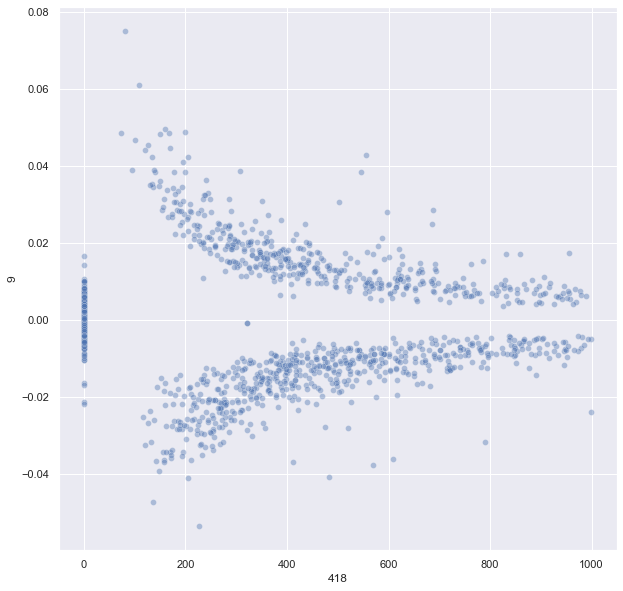

In [1495]:
sns.set( rc = {'figure.figsize' : ( 10, 10 ), 
               'axes.labelsize' : 12 })
sns.scatterplot(x=sgdt_mod['418'], y=sgdt_mod['9'],data=sgdt_mod,sizes = (50, 300),alpha=0.4)  # Plots the scatter plot using two variables


The above data is negatively correlated. The data seems to have a mirror pattern from the 0 value of axis '9'

<AxesSubplot:xlabel='419', ylabel='10'>

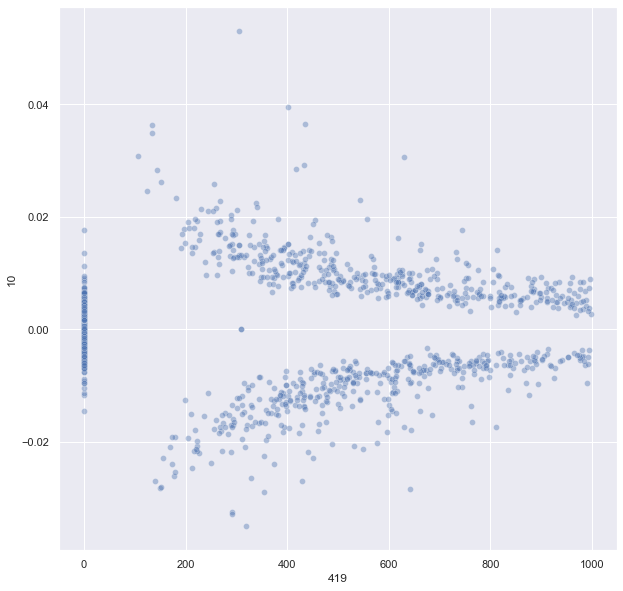

In [1496]:
sns.set( rc = {'figure.figsize' : ( 10, 10 ), 
               'axes.labelsize' : 12 })
sns.scatterplot(x=sgdt_mod['419'], y=sgdt_mod['10'],data=sgdt_mod,sizes = (50, 300),alpha=0.4)  # Plots the scatter plot using two variables


The above data is negatively correlateed. The data seems to have a mirror pattern from the 0 value of axis '10'

In [1498]:
print('-' * 50)
print('4. Data pre-processing:')
print('-' * 50)

--------------------------------------------------
4. Data pre-processing:
--------------------------------------------------


4.A. Segregate predictors vs target attributes

In [1505]:
x_scaled=zs
x_scaled #Predictors

586       101        59           589            76        41  \
0     2.528283e-15  0.940846  0.492923  1.665950e-15  2.668846e-01  0.496231   
1     9.601744e-01  1.783099  0.226438  1.156689e+00  2.911732e-01  0.247731   
2     2.991151e+00  0.421127  2.194423  1.791486e-01  9.744338e-02  0.888711   
3     1.018947e-01  0.032864  2.252754  2.752459e-01  5.073124e-01  0.885778   
4     1.018947e-01  1.329109  1.604435  2.752459e-01  1.447915e+00  0.488600   
...            ...       ...       ...           ...           ...       ...   
1562  1.186890e+00  0.032864  0.014939  1.103056e+00  1.369351e-15  0.822571   
1563  1.186890e+00  0.940846  0.664266  1.103056e+00  1.369351e-15  0.174274   
1564  1.423796e-01  0.875118  0.188669  5.983777e-01  1.369351e-15  0.209294   
1565  3.839239e-01  0.032864  0.158601  6.581942e-02  1.369351e-15  0.549244   
1566  7.901378e-01  0.032864  0.114478  4.061977e-01  1.369351e-15  0.261397   

                81           488           129            78  ...       102  \
0     2.105246e+00  1.197906e+00  4.166837e-01  3.591876e-01  ...  2.131021   
1     9.799738e-01  6.326540e-01  3.778042e-01  6.392531e-01  ...  1.214681   
2     1.749110e-01  6.433685e-01  3.000451e-01  7.358054e-01  ...  0.195544   
3     1.418633e+00  1.410324e+00  6.888405e-01  1.129582e+00  ...  1.130322   
4     5.243377e-01  1.582088e+00  1.107343e-02  6.582049e-01  ...  1.090065   
...            ...           ...           ...           ...  ...       ...   
1562  1.027388e-15  6.820525e-16  4.555632e-01  6.209937e-16  ...  1.590317   
1563  1.027388e-15  6.820525e-16  3.389246e-01  6.209937e-16  ...  1.343142   
1564  1.027388e-15  6.820525e-16  7.300627e-16  6.209937e-16  ...  0.017276   
1565  1.027388e-15  6.820525e-16  3.609893e-01  6.209937e-16  ...  1.872043   
1566  1.027388e-15  6.820525e-16  7.300627e-16  6.209937e-16  ...  1.731976   

           500            75            77       107            82       108  \
0     0.746780  8.819470e-01  6.794168e-01  2.807475  2.921554e-01  3.816708   
1     0.746780  1.358007e-01  2.391430e-01  0.904751  1.216947e-01  0.918530   
2     0.746780  4.056114e-02  5.917706e-02  0.324637  6.328032e-01  0.716367   
3     1.458534  2.197602e+00  1.059183e+00  0.533164  6.048588e-01  1.238525   
4     0.746780  2.102638e+00  3.103958e-01  0.895220  3.033331e-01  2.229702   
...        ...           ...           ...       ...           ...       ...   
1562  0.746780  7.844591e-17  1.393710e-16  0.407131  1.211894e-16  1.327477   
1563  1.963248  7.844591e-17  1.393710e-16  0.421245  1.211894e-16  0.210381   
1564  0.746780  7.844591e-17  1.393710e-16  1.100309  1.211894e-16  0.686068   
1565  0.596273  7.844591e-17  1.393710e-16  1.587617  1.211894e-16  0.128361   
1566  0.746780  7.844591e-17  1.393710e-16  0.617168  1.211894e-16  0.783369   

                 9            10        24  
0     1.128417e+00  3.815427e-01  0.361942  
1     2.258170e-02  1.608247e+00  0.462653  
2     3.271829e-01  1.242037e-01  0.557914  
3     7.654084e-01  3.707821e-01  0.468515  
4     1.495842e-01  7.904439e-01  0.143314  
...            ...           ...       ...  
1562  2.422889e-01  6.290355e-01  0.225730  
1563  3.482372e-01  1.016416e+00  0.219868  
1564  1.220487e-16  6.708308e-17  0.319804  
1565  4.210766e-01  3.286543e-01  0.239093  
1566  1.220487e-16  6.708308e-17  0.043588  

[1567 rows x 39 columns]

In [1506]:
y=sigdat['Pass/Fail']
y #Target attributes

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

4.B. Check for target balancing and fix it if found imbalanced

In [1508]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [ ]:
Pass criteria has 1463, Fail criteria has 104. So the data is imbalanced which need to be balanced

In [1925]:
x_mod=sgdt.drop(['Pass/Fail'],axis=1)
x_mod

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...     576      577     582     583  \
0     1.500500  0.016200 -0.003400  ...  1.6765  14.9509  0.5005  0.0118   
1     1.496600 -0.000500 -0.014800  ...  1.1065  10.9003  0.5019  0.0223   
2     1.443600  0.004100  0.001300  ...  2.0952   9.2721  0.4958  0.0157   
3     1.488200 -0.012400 -0.003300  ...  1.7585   8.5831  0.4990  0.0103   
4     1.503100 -0.003100 -0.007200  ...  1.6597  10.9698  0.4800  0.4766   
...        ...       ...       ...  ...     ...      ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  1.4879  11.7256  0.4988  0.0143   
1563  1.433300 -0.006100 -0.009300  ...  1.0187  17.8379  0.4975  0.0131   
1564  1.462862 -0.000841  0.000146  ...  1.2237  17.7267  0.4987  0.0153   
1565  1.462200 -0.007200  0.003200  ...  1.7085  19.2104  0.5004  0.0178   
1566  1.462862 -0.000841  0.000146  ...  1.2878  22.9183  0.4987  0.0181   

         584      585       586       587       588         589  
0     0.0035   2.3630  0.021458  0.016475  0.005283   99.670066  
1     0.0055   4.4447  0.009600  0.020100  0.006000  208.204500  
2     0.0039   3.1745  0.058400  0.048400  0.014800   82.860200  
3     0.0025   2.0544  0.020200  0.014900  0.004400   73.843200  
4     0.1045  99.3032  0.020200  0.014900  0.004400   73.843200  
...      ...      ...       ...       ...       ...         ...  
1562  0.0039   2.8669  0.006800  0.013800  0.004700  203.172000  
1563  0.0036   2.6238  0.006800  0.013800  0.004700  203.172000  
1564  0.0041   3.0590  0.019700  0.008600  0.002500   43.523100  
1565  0.0038   3.5662  0.026200  0.024500  0.007500   93.494100  
1566  0.0040   3.6275  0.011700  0.016200  0.004500  137.784400  

[1567 rows x 442 columns]

SMOTE to upsample smaller class

In [1511]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [1512]:
from sklearn import metrics
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [1926]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x_mod, y, test_size=test_size, random_state=seed)

In [1927]:
print("Before UpSampling, counts of label '-1': {}".format(sum(y_train==-1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y_train==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After UpSampling, counts of label '-1': {}".format(sum(y_train_res==-1)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_train_res==1)))

print('After UpSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '-1': 1015
Before UpSampling, counts of label '1': 81 

After UpSampling, counts of label '-1': 1015
After UpSampling, counts of label '1': 1015 

After UpSampling, the shape of train_X: (2030, 442)
After UpSampling, the shape of train_y: (2030,) 



In [1928]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)

0.9511677282377919


In [1929]:
test_pred = model.predict(x_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       448
           1       0.00      0.00      0.00        23

    accuracy                           0.95       471
   macro avg       0.48      0.50      0.49       471
weighted avg       0.90      0.95      0.93       471

[[448   0]
 [ 23   0]]


IMBLearn Random Over Sampling

In [1930]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x_train, y_train)

In [1931]:
y_ros.shape

(2030,)

In [1932]:
x_ros.shape

(2030, 442)

Cluster based undersampling

In [1933]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()  
x_cc, y_cc = cc.fit_resample(x_train, y_train)

In [1934]:
x_cc.shape

(162, 442)

In [1935]:
y_cc.shape

(162,)

In [1936]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_sgst_train, x_sgst_test, y_sgdt_train, y_sgst_test = train_test_split(x_mod, y, test_size=test_size, random_state=seed)

In [1937]:
print("Before UpSampling, counts of label '-1': {}".format(sum(y_sgdt_train==-1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y_sgdt_train==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_resample(x_sgst_train, y_sgdt_train.ravel())

print("After UpSampling, counts of label '-1': {}".format(sum(y_train_res==-1)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_train_res==1)))

print('After UpSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '-1': 1015
Before UpSampling, counts of label '1': 81 

After UpSampling, counts of label '-1': 1015
After UpSampling, counts of label '1': 1015 

After UpSampling, the shape of train_X: (2030, 442)
After UpSampling, the shape of train_y: (2030,) 



In [1942]:
# Fit the model on upsampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(round((model_score*100),2),"%")

95.12 %


In [1528]:
print('-' * 50)
print('5. Model training, testing and tuning')
print('-' * 50)

--------------------------------------------------
5. Model training, testing and tuning
--------------------------------------------------


5.A. Use any Supervised Learning technique to train a model

In [1530]:
from sklearn import svm

In [1898]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=test_size, random_state=seed)

In [1899]:
clf = svm.SVC(gamma=0.025, C=3) 

In [1900]:
clf.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [1901]:
y_pred = clf.predict(x_test)

In [1902]:
y_grid = (np.column_stack([y_test, y_pred]))

In [1903]:
print(y_grid)

[[ 1  1]
 [ 1  1]
 [ 1  1]
 ...
 [-1 -1]
 [ 1  1]
 [-1 -1]]


5.B. Use cross validation techniques

In [1904]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1905]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds)
lr_scaled = LogisticRegression()
results = cross_val_score(lr_scaled, x_ros, y_ros, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.46341463 0.65853659 0.56097561 0.68292683 0.75609756 0.70731707
 0.70731707 0.65853659 0.6097561  0.73170732 0.70731707 0.70731707
 0.73170732 0.70731707 0.65853659 0.65853659 0.70731707 0.70731707
 0.53658537 0.65853659 0.7804878  0.65853659 0.63414634 0.53658537
 0.65853659 0.65853659 0.80487805 0.68292683 0.68292683 0.6097561
 0.675      0.65       0.75       0.775      0.7        0.625
 0.575      0.625      0.6        0.675      0.775      0.75
 0.675      0.7        0.6        0.7        0.65       0.6
 0.7        0.725     ]
Accuracy: 67.099% (6.716%)


5.C. Apply hyper-parameter tuning techniques to get the best accuracy

In [1910]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_red_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_red_cv.fit(x_ros, y_ros)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_red_cv.best_params_))
print("Best score is {}%".format(logreg_red_cv.best_score_*100))

Tuned Logistic Regression Parameters: {'C': 0.0007196856730011522}
Best score is 70.39408866995073%


In [1912]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_red_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_red_cv.fit(x_ros, y_ros)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_red_cv.best_params_))
print("Best score is {}%".format(tree_red_cv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2}
Best score is 95.27093596059115%


Decission Tree Classifier gave best score of all the cross validations

5.D. Use any other technique/method which can enhance the model performance

In [1582]:
sgdt

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...     576      577     582     583  \
0     1.500500  0.016200 -0.003400  ...  1.6765  14.9509  0.5005  0.0118   
1     1.496600 -0.000500 -0.014800  ...  1.1065  10.9003  0.5019  0.0223   
2     1.443600  0.004100  0.001300  ...  2.0952   9.2721  0.4958  0.0157   
3     1.488200 -0.012400 -0.003300  ...  1.7585   8.5831  0.4990  0.0103   
4     1.503100 -0.003100 -0.007200  ...  1.6597  10.9698  0.4800  0.4766   
...        ...       ...       ...  ...     ...      ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  1.4879  11.7256  0.4988  0.0143   
1563  1.433300 -0.006100 -0.009300  ...  1.0187  17.8379  0.4975  0.0131   
1564  1.462862 -0.000841  0.000146  ...  1.2237  17.7267  0.4987  0.0153   
1565  1.462200 -0.007200  0.003200  ...  1.7085  19.2104  0.5004  0.0178   
1566  1.462862 -0.000841  0.000146  ...  1.2878  22.9183  0.4987  0.0181   

         584      585       586       587       588         589  
0     0.0035   2.3630  0.021458  0.016475  0.005283   99.670066  
1     0.0055   4.4447  0.009600  0.020100  0.006000  208.204500  
2     0.0039   3.1745  0.058400  0.048400  0.014800   82.860200  
3     0.0025   2.0544  0.020200  0.014900  0.004400   73.843200  
4     0.1045  99.3032  0.020200  0.014900  0.004400   73.843200  
...      ...      ...       ...       ...       ...         ...  
1562  0.0039   2.8669  0.006800  0.013800  0.004700  203.172000  
1563  0.0036   2.6238  0.006800  0.013800  0.004700  203.172000  
1564  0.0041   3.0590  0.019700  0.008600  0.002500   43.523100  
1565  0.0038   3.5662  0.026200  0.024500  0.007500   93.494100  
1566  0.0040   3.6275  0.011700  0.016200  0.004500  137.784400  

[1567 rows x 442 columns]

In [1583]:
from sklearn.decomposition import PCA

In [1917]:
x1=sgdt

In [1918]:
x1

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     583     584  \
0     1.500500  0.016200 -0.003400  ...  14.9509  0.5005  0.0118  0.0035   
1     1.496600 -0.000500 -0.014800  ...  10.9003  0.5019  0.0223  0.0055   
2     1.443600  0.004100  0.001300  ...   9.2721  0.4958  0.0157  0.0039   
3     1.488200 -0.012400 -0.003300  ...   8.5831  0.4990  0.0103  0.0025   
4     1.503100 -0.003100 -0.007200  ...  10.9698  0.4800  0.4766  0.1045   
...        ...       ...       ...  ...      ...     ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  11.7256  0.4988  0.0143  0.0039   
1563  1.433300 -0.006100 -0.009300  ...  17.8379  0.4975  0.0131  0.0036   
1564  1.462862 -0.000841  0.000146  ...  17.7267  0.4987  0.0153  0.0041   
1565  1.462200 -0.007200  0.003200  ...  19.2104  0.5004  0.0178  0.0038   
1566  1.462862 -0.000841  0.000146  ...  22.9183  0.4987  0.0181  0.0040   

          585       586       587       588         589  Pass/Fail  
0      2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1      4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2      3.1745  0.058400  0.048400  0.014800   82.860200          1  
3      2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...       ...       ...       ...       ...         ...        ...  
1562   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 443 columns]

In [1919]:
x2=x_ros
x2

586       101        59       589        76        41        81  \
0     0.968271  0.032864  0.904395  0.987173  0.145442  0.747349  1.210951   
1     0.587713  1.329109  0.113849  0.297255  0.303896  0.047006  2.738952   
2     0.521573  0.032864  0.250818  0.233590  0.525529  0.047433  0.950757   
3     0.393386  0.486855  0.286778  0.277481  0.312426  0.348520  0.364035   
4     0.247640  0.486855  0.185230  0.207756  0.692512  0.461694  0.820462   
...        ...       ...       ...       ...       ...       ...       ...   
2025  0.918324  0.486855  5.334700  0.299863  4.760842  0.084959  2.223696   
2026  0.084336  0.032864  1.298616  0.148697  0.741090  0.187513  0.891532   
2027  0.490550  0.032864  0.585522  0.813825  0.018506  0.151583  0.032376   
2028  0.124821  0.032864  0.737594  0.087856  1.760630  0.121317  1.092896   
2029  0.537767  0.032864  0.968414  0.122744  0.889278  0.756375  0.352586   

           488       129        78  ...       102       500        75  \
0     0.867110  0.494443  1.024606  ...  0.192360  0.746780  1.569030   
1     1.000718  0.377804  1.641593  ...  0.504794  1.813122  0.488249   
2     1.410324  0.338925  1.871120  ...  0.153033  0.746780  0.158411   
3     0.064986  0.455563  0.177780  ...  0.889979  0.746780  0.379719   
4     1.410324  1.048656  0.272539  ...  1.560075  0.746780  0.239533   
...        ...       ...       ...  ...       ...       ...       ...   
2025  1.090220  0.494443  0.247583  ...  0.811987  0.746780  1.596439   
2026  1.410324  0.027806  1.386796  ...  0.985480  0.746780  1.008566   
2027  0.439605  0.455563  0.030690  ...  1.447066  0.746780  0.669408   
2028  1.410324  2.475984  0.114607  ...  0.385418  0.746780  0.334773   
2029  0.515262  0.183406  0.729801  ...  0.590279  2.304455  0.805071   

            77       107        82       108         9        10        24  
0     0.512306  1.440597  0.906931  1.625523  0.546890  0.048880  0.276077  
1     0.461439  0.954799  0.783976  0.684021  0.573377  0.790444  0.207799  
2     0.731388  0.687840  0.719704  0.873476  0.149584  1.243302  0.621863  
3     0.104720  0.349063  0.515437  0.190743  2.340200  1.489880  0.406013  
4     0.348960  0.428120  0.071395  1.088347  0.983927  1.037937  0.487625  
...        ...       ...       ...       ...       ...       ...       ...  
2025  0.525160  0.405205  0.406454  0.811986  1.818269  0.888203  0.601777  
2026  0.232716  0.485407  1.038270  0.021817  0.042447  0.091008  0.067468  
2027  0.451246  1.134682  0.621625  1.065242  0.003905  1.426231  0.502827  
2028  0.943490  0.036273  1.407136  0.187277  1.135038  2.039583  0.115813  
2029  0.760311  1.234362  2.242672  1.185122  1.785160  0.629036  0.398341  

[2030 rows x 39 columns]

In [1920]:
y2=y_ros
y2

0       1
1      -1
2      -1
3      -1
4      -1
       ..
2025    1
2026    1
2027    1
2028    1
2029    1
Name: Pass/Fail, Length: 2030, dtype: int64

In [1922]:
from scipy.stats import zscore
x1Scaled=sgdt.apply(zscore)
x1Scaled.head()

0         1         2         3         4         6         7  \
0  0.224309  0.849725 -0.436273  0.033555 -0.050580 -0.563790  0.266269   
1  1.107136 -0.382910  1.017137  0.153067 -0.060045  0.198217  0.322244   
2 -1.114158  0.799102 -0.481289  0.686213 -0.047906 -0.906210  0.255074   
3 -0.350312 -0.198875 -0.051547 -1.106948 -0.051290  0.503246 -0.013602   
4  0.242143  0.087526  1.117387 -0.158919 -0.047492 -0.115382  0.187905   

          8         9        10  ...       577       582        583  \
0  0.509826  1.128417 -0.381543  ... -0.135520  0.118699  -0.204890   
1  0.456999  0.022582 -1.608247  ... -0.460054  0.530203   0.406679   
2 -0.260907  0.327183  0.124204  ... -0.590505 -1.262780   0.022264   
3  0.343218 -0.765408 -0.370782  ... -0.645708 -0.322199  -0.292257   
4  0.545044 -0.149584 -0.790444  ... -0.454486 -5.906899  26.867231   

         584        585           586           587           588  \
0  -0.093207  -0.197113 -2.528283e-15 -2.759188e-15 -6.054371e-15   
1   0.444706   0.385059 -9.601744e-01  4.118532e-01  2.501244e-01   
2   0.014375   0.029833  2.991151e+00  3.627063e+00  3.321419e+00   
3  -0.362164  -0.283417 -1.018947e-01 -1.789275e-01 -3.082928e-01   
4  27.071425  26.913347 -1.018947e-01 -1.789275e-01 -3.082928e-01   

            589  Pass/Fail  
0 -1.665950e-15  -0.266621  
1  1.156689e+00  -0.266621  
2 -1.791486e-01   3.750641  
3 -2.752459e-01  -0.266621  
4 -2.752459e-01  -0.266621  

[5 rows x 443 columns]

In [1589]:
covMatrix = np.cov(x1Scaled,rowvar=False)
print(covMatrix)

[[ 1.00063857 -0.14393166  0.00475868 ... -0.02589702 -0.0281841
   0.00417663]
 [-0.14393166  1.00063857  0.00577089 ...  0.01727747  0.0101242
   0.04482545]
 [ 0.00475868  0.00577089  1.00063857 ... -0.02936364 -0.03083797
  -0.03291098]
 ...
 [-0.02589702  0.01727747 -0.02936364 ...  1.00063857  0.97489776
   0.39106264]
 [-0.0281841   0.0101242  -0.03083797 ...  0.97489776  1.00063857
   0.3894599 ]
 [ 0.00417663  0.04482545 -0.03291098 ...  0.39106264  0.3894599
   1.00063857]]


In [1610]:
pca = PCA(n_components=150)
pca.fit(x1Scaled)

PCA(n_components=150)

In [1611]:
print(pca.explained_variance_)

[25.56156642 17.11026493 13.34076514 11.96649578  9.79378494  9.27748729
  8.60406556  8.43331495  7.53681056  6.86161491  6.28435318  6.13227671
  5.97570191  5.92907777  5.59348146  5.37185191  5.29741348  5.13393174
  4.94385254  4.7977968   4.72605415  4.61032495  4.45139365  4.40226638
  4.35723792  4.33620677  4.06118297  4.02577985  3.93735146  3.85189169
  3.82410657  3.70565821  3.64717479  3.56408505  3.53915386  3.48274637
  3.38643005  3.30464835  3.2802167   3.18665657  3.16356017  3.11028138
  3.08062646  3.06612599  2.95487975  2.90611047  2.8558232   2.82994297
  2.7917109   2.72871133  2.68870752  2.61764379  2.60073285  2.55316498
  2.53441214  2.51283549  2.46010421  2.39707996  2.38442702  2.34992234
  2.27332024  2.26242299  2.231656    2.20256322  2.14119448  2.13531088
  2.07782373  2.05822644  2.01609935  1.98800994  1.94686171  1.93800607
  1.86877576  1.79873713  1.78318493  1.71456115  1.69658084  1.67999139
  1.6397389   1.58998188  1.55408347  1.53886058  1

In [1612]:
print(pca.components_)

[[-6.09913029e-03 -8.57879759e-05 -4.01180578e-03 ...  3.83120579e-05
   3.17644455e-04  1.53996198e-02]
 [-2.41225686e-02  1.26109587e-02  8.89430011e-03 ...  2.06706061e-02
   1.68742771e-02  1.68359174e-02]
 [-9.14029705e-03 -3.11957483e-03 -7.75841641e-03 ...  4.11105517e-03
   4.30377642e-03 -8.28204132e-03]
 ...
 [-3.63153879e-04  1.11537912e-02  5.03669484e-02 ...  1.94593121e-02
   1.65023660e-02 -5.33544648e-02]
 [ 8.91146007e-02  1.13477022e-02 -1.42063680e-02 ...  1.49509449e-02
   1.19933490e-02 -1.93083460e-02]
 [ 1.43892714e-01  1.16450757e-01  3.04687430e-02 ... -2.27718002e-02
  -2.17635452e-02 -2.26096562e-02]]


In [1613]:
print(pca.explained_variance_ratio_)

[0.05779469 0.0386863  0.03016347 0.02705624 0.02214374 0.0209764
 0.01945379 0.01906772 0.01704073 0.01551411 0.01420892 0.01386508
 0.01351106 0.01340564 0.01264686 0.01214576 0.01197745 0.01160782
 0.01117805 0.01084782 0.01068561 0.01042394 0.0100646  0.00995352
 0.00985171 0.00980416 0.00918233 0.00910229 0.00890235 0.00870913
 0.0086463  0.00837849 0.00824626 0.00805839 0.00800203 0.00787449
 0.00765672 0.00747181 0.00741657 0.00720503 0.00715281 0.00703235
 0.0069653  0.00693251 0.00668098 0.00657071 0.00645702 0.0063985
 0.00631206 0.00616962 0.00607917 0.00591849 0.00588026 0.00577271
 0.0057303  0.00568152 0.00556229 0.0054198  0.00539119 0.00531317
 0.00513998 0.00511534 0.00504577 0.00497999 0.00484124 0.00482794
 0.00469796 0.00465365 0.0045584  0.00449489 0.00440185 0.00438183
 0.0042253  0.00406694 0.00403178 0.00387662 0.00383597 0.00379846
 0.00370745 0.00359495 0.00351378 0.00347936 0.00339715 0.00338247
 0.00332786 0.00327423 0.00312526 0.00311727 0.00308429 0.003021

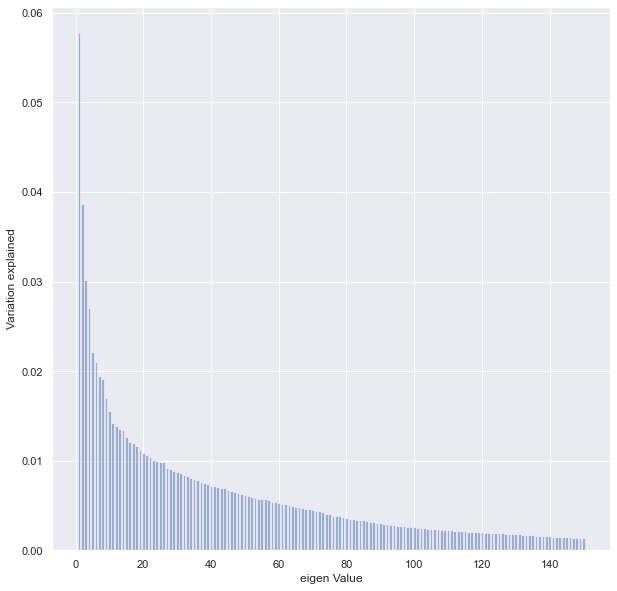

In [1615]:
plt.bar(list(range(1,151)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

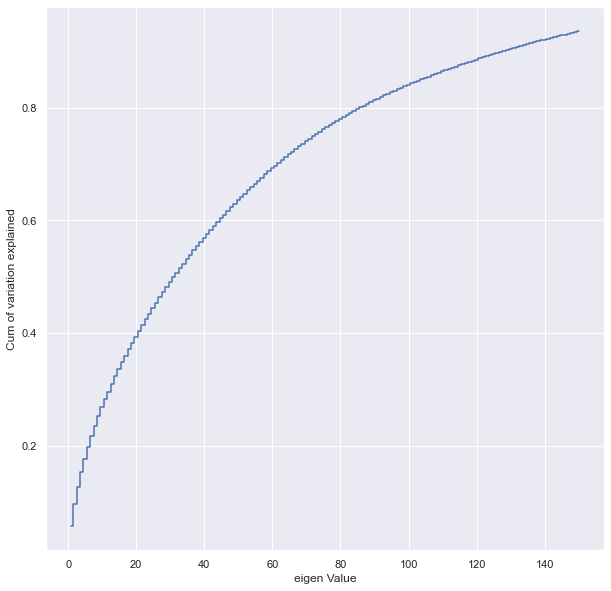

<Figure size 360x360 with 0 Axes>

In [1624]:
plt.step(list(range(1,151)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.figure(figsize=(5,5))
plt.show()

In [1617]:
pca1 = PCA(n_components=120)
pca1.fit(x1Scaled)
print(pca1.components_)
print(pca1.explained_variance_ratio_)
Xpca1 = pca1.transform(x1Scaled)

[[-6.09913115e-03 -8.57868915e-05 -4.01180885e-03 ...  3.83114749e-05
   3.17643934e-04  1.53996184e-02]
 [-2.41225754e-02  1.26109558e-02  8.89429089e-03 ...  2.06705992e-02
   1.68742702e-02  1.68359003e-02]
 [-9.14028062e-03 -3.11957588e-03 -7.75836463e-03 ...  4.11104483e-03
   4.30376682e-03 -8.28209211e-03]
 ...
 [-1.65259466e-01  4.07811284e-02  6.11871905e-03 ...  1.24511255e-02
   1.35194764e-02  1.37619210e-02]
 [-7.98942954e-02  1.62755121e-01 -1.14661786e-01 ...  1.04356450e-02
   1.22359036e-02  2.23201160e-02]
 [ 1.52979729e-01  1.04880159e-01  4.97123292e-02 ... -1.39434347e-02
  -1.70236407e-02 -5.53889832e-02]]
[0.05779469 0.0386863  0.03016347 0.02705624 0.02214374 0.0209764
 0.01945379 0.01906772 0.01704073 0.01551411 0.01420892 0.01386508
 0.01351106 0.01340564 0.01264686 0.01214575 0.01197745 0.01160782
 0.01117805 0.01084782 0.01068561 0.01042394 0.0100646  0.00995352
 0.00985171 0.00980416 0.00918233 0.00910228 0.00890235 0.00870912
 0.0086463  0.00837849 0.00824

In [1618]:
Xpca1

array([[-1.76237326,  2.84822246,  3.74560639, ...,  0.29640727,
        -0.90469615, -0.63249068],
       [-2.28585897,  0.70318795,  2.78017381, ..., -1.95927359,
         0.34408724, -1.45636803],
       [ 0.13231202,  0.75834495,  1.29366121, ..., -0.81923404,
         0.16379349,  0.71224586],
       ...,
       [-1.12016883, -1.46011894, -1.30860288, ...,  0.23637553,
         0.30634123, -0.75561198],
       [-1.1084591 , -3.15844928, -3.38099708, ..., -0.15993539,
         0.10130499, -0.01757573],
       [ 2.10804246, -2.83027837, -2.21883854, ..., -0.85619302,
        -0.17926925,  0.20467161]])

In [1643]:
Xpca1.shape #optimised PCA data

(1567, 120)

In [1644]:
x1Scaled.shape #Scaled original data after removal of outliers, missing values

(1567, 442)

In [1944]:
from scipy.stats import zscore
x_ros_Scaled=x_ros.apply(zscore)
x_ros_Scaled.head()

0         1         2         3         4         6         7  \
0 -0.279646 -0.348992 -0.307219 -0.678258 -0.038024  0.396467 -0.152172   
1 -0.067548  0.275509  0.487216 -0.341936 -0.050082  0.691558  0.189107   
2  0.242914  1.323367  0.223236  0.343622 -0.043992  1.579544  0.366067   
3 -1.130620  0.281000 -0.652317 -0.734920 -0.048429 -1.207953  0.100627   
4 -1.075044  0.395811 -0.051420 -0.596012 -0.038398  0.339365  0.113267   

          8         9        10  ...       576       577       582       583  \
0  0.486586 -0.549078  0.037537  ... -0.218403  0.180505 -0.229326  1.436553   
1  1.950336 -0.576299 -0.785843  ... -0.221200 -0.417055  0.702753  0.353454   
2 -0.788904 -0.140751  1.209270  ... -0.226515  0.029663  1.352383  0.099602   
3 -2.222007  2.418098 -1.471992  ... -0.243951 -0.715304 -1.839279  0.057294   
4 -0.886682 -0.998237 -1.028634  ... -0.258457 -0.210371  1.437118  0.328069   

        584       585       586       587       588       589  
0  1.029842  1.390633 -1.029535  0.174295  0.299150  1.076150  
1  0.117808  0.334518 -0.627164 -0.737200 -0.797385 -0.305329  
2  0.197116  0.085770  0.545706  0.541116  0.263778 -0.236852  
3 -0.080460  0.068446 -0.421697 -0.514884 -0.620525 -0.284060  
4  0.355730  0.301504 -0.267598 -0.225874  0.016173 -0.209067  

[5 rows x 442 columns]

In [1945]:
covMatrix = np.cov(x_ros_Scaled,rowvar=False)
print(covMatrix)

[[ 1.00049285 -0.20033251  0.0475296  ... -0.00970352 -0.02893863
  -0.01441541]
 [-0.20033251  1.00049285 -0.04150426 ...  0.15240581  0.13916273
   0.12159979]
 [ 0.0475296  -0.04150426  1.00049285 ... -0.12121333 -0.10189753
  -0.07838181]
 ...
 [-0.00970352  0.15240581 -0.12121333 ...  1.00049285  0.96892119
   0.36827015]
 [-0.02893863  0.13916273 -0.10189753 ...  0.96892119  1.00049285
   0.38812127]
 [-0.01441541  0.12159979 -0.07838181 ...  0.36827015  0.38812127
   1.00049285]]


In [1946]:
pca = PCA(n_components=150)
pca.fit(x_ros_Scaled)

PCA(n_components=150)

In [1947]:
print(pca.explained_variance_)

[31.74786527 21.48435192 13.43482462 12.59503071 11.10433398 10.30573061
  9.81845357  8.62338289  8.10617002  8.05324533  7.51202343  7.44398604
  7.27500601  6.9402565   6.34166995  6.2483685   6.12134641  6.10792176
  5.93455841  5.65778012  5.30956164  5.17289506  5.16957867  5.01662847
  4.80110151  4.77477255  4.5846489   4.43272685  4.31729464  4.27083355
  4.10806888  4.09174909  3.9770257   3.90793953  3.75661629  3.68218169
  3.61286753  3.54111253  3.47680361  3.40689799  3.28649992  3.22276019
  3.12270641  3.07184786  2.9795595   2.96318211  2.83946888  2.82475995
  2.73070087  2.64188609  2.59064026  2.56254146  2.48351865  2.47188612
  2.38048195  2.32933373  2.27431245  2.22989933  2.17811838  2.15912916
  2.07753564  2.02532683  2.01165257  1.96839888  1.95041847  1.86719991
  1.81605008  1.78728875  1.74316718  1.71126529  1.68801937  1.63493706
  1.6003151   1.568606    1.49866224  1.4555868   1.41841642  1.38849784
  1.3857942   1.35352698  1.3006614   1.28566793  1

In [1948]:
print(pca.components_)

[[-0.00553276 -0.01112396 -0.01767904 ...  0.01553363  0.01219257
   0.00668942]
 [-0.0337752   0.03552232  0.00043794 ...  0.03446167  0.03098851
   0.02185491]
 [-0.04161101  0.00114508  0.02972482 ... -0.00669721 -0.00237774
   0.0014489 ]
 ...
 [ 0.03340398  0.01204826 -0.00440231 ...  0.01914948  0.01823886
  -0.00726223]
 [-0.03855111  0.07412117 -0.23888657 ... -0.02951778 -0.02432003
   0.07453757]
 [-0.00038976  0.04995859  0.08618644 ... -0.05080323 -0.06005726
  -0.06626116]]


In [1949]:
print(pca.explained_variance_ratio_)

[0.07179237 0.04858319 0.03038056 0.02848151 0.02511055 0.02330465
 0.02220275 0.01950031 0.01833072 0.01821104 0.01698716 0.0168333
 0.01645118 0.0156942  0.0143406  0.01412962 0.01384238 0.01381202
 0.01341999 0.0127941  0.01200667 0.01169762 0.01169012 0.01134425
 0.01085687 0.01079733 0.0103674  0.01002385 0.00976282 0.00965776
 0.0092897  0.00925279 0.00899336 0.00883714 0.00849495 0.00832662
 0.00816988 0.00800762 0.0078622  0.00770412 0.00743186 0.00728772
 0.00706147 0.00694646 0.00673776 0.00670073 0.00642097 0.00638771
 0.00617501 0.00597417 0.00585829 0.00579475 0.00561605 0.00558975
 0.00538305 0.00526739 0.00514297 0.00504254 0.00492544 0.0048825
 0.00469799 0.00457993 0.00454901 0.0044512  0.00441054 0.00422235
 0.00410669 0.00404165 0.00394187 0.00386973 0.00381717 0.00369713
 0.00361884 0.00354713 0.00338897 0.00329156 0.00320751 0.00313985
 0.00313374 0.00306077 0.00294122 0.00290732 0.0028723  0.0028115
 0.0027163  0.00267976 0.00266159 0.00259446 0.00254302 0.0025028

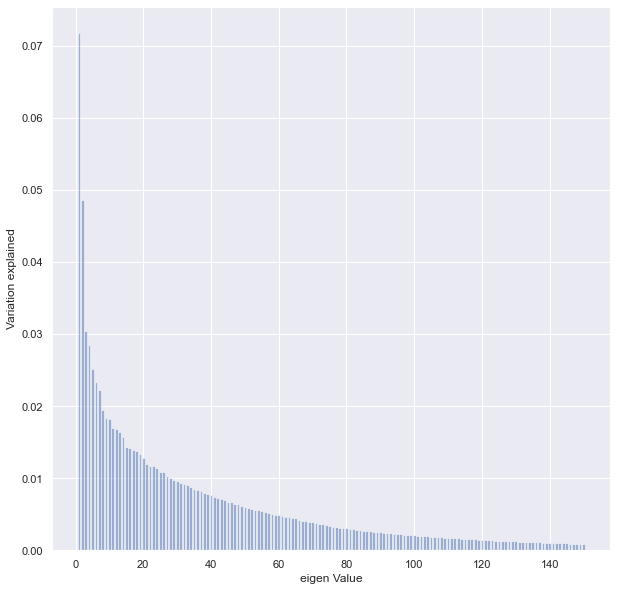

In [1950]:
plt.bar(list(range(1,151)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

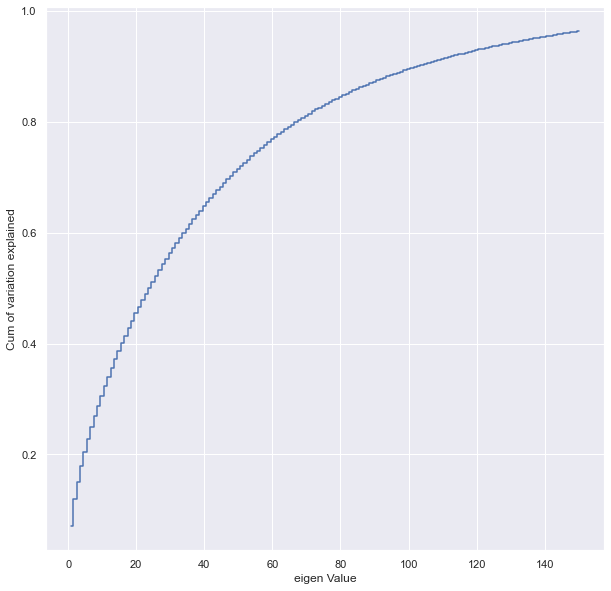

In [1951]:
plt.step(list(range(1,151)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Dimensionality Reduction

In [1953]:
pca120 = PCA(n_components=120)
pca120.fit(x_ros_Scaled)
print(pca120.components_)
print(pca120.explained_variance_ratio_)
Xpca120 = pca120.transform(x_ros_Scaled)

[[-0.00553276 -0.01112396 -0.01767904 ...  0.01553363  0.01219257
   0.00668942]
 [-0.0337752   0.03552232  0.00043794 ...  0.03446167  0.03098851
   0.02185491]
 [-0.04161102  0.00114506  0.02972482 ... -0.00669721 -0.00237774
   0.0014489 ]
 ...
 [-0.08199101  0.15393632  0.05023139 ...  0.01120925  0.01274311
   0.09234398]
 [ 0.0708301   0.02518091 -0.05569655 ... -0.03680465 -0.0392965
   0.07594205]
 [ 0.06908236 -0.03641449 -0.12279215 ... -0.02625299 -0.03119821
   0.00857028]]
[0.07179237 0.04858319 0.03038056 0.02848151 0.02511055 0.02330465
 0.02220275 0.01950031 0.01833072 0.01821104 0.01698716 0.0168333
 0.01645118 0.0156942  0.0143406  0.01412962 0.01384238 0.01381202
 0.01341999 0.0127941  0.01200667 0.01169762 0.01169012 0.01134425
 0.01085687 0.01079733 0.0103674  0.01002385 0.00976282 0.00965776
 0.00928969 0.00925279 0.00899336 0.00883714 0.00849494 0.00832662
 0.00816988 0.00800762 0.0078622  0.00770412 0.00743186 0.00728772
 0.00706146 0.00694646 0.00673776 0.00670

In [1954]:
Xpca120

array([[ 3.83794048e-01,  1.95570413e+01, -4.13067395e+00, ...,
         4.28005739e-01,  2.17913096e-01,  3.17757108e-02],
       [ 1.72709960e+00,  8.12012224e-01,  1.36347002e+00, ...,
        -4.04525259e-01,  8.70861157e-01,  8.58234626e-02],
       [ 3.96612850e-01,  1.57482347e+00,  2.87479280e+00, ...,
        -4.07542019e-01, -9.02641012e-01,  7.99347484e-01],
       ...,
       [-1.96372095e+00, -1.64914767e+00,  1.15952799e+00, ...,
         1.79422336e-01, -5.07569534e-03, -1.49663642e-01],
       [ 1.90640669e+00, -1.67357337e+00, -1.73720336e+00, ...,
         4.66897642e-02,  3.71532800e-01,  5.16354719e-01],
       [ 2.46716106e+00, -1.84598215e+00, -4.80548540e+00, ...,
        -4.59908737e-01,  1.71171570e-01, -6.78975008e-02]])

Fit Linear Model

In [1963]:
regression_model = LinearRegression()
regression_model.fit(x1Scaled, y)
regression_model.score(x1Scaled, y)

1.0

In [1964]:
regression_model = LinearRegression()
regression_model.fit(x_ros_Scaled, y_ros)
regression_model.score(x_ros_Scaled, y_ros)

0.8425257360505461

In [1960]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca120, y_ros)
regression_model_pca.score(Xpca120, y_ros)

0.48563855715747084

After PCA reduction on balanced dataset, the accuracy score is reduced significantly.

5.E. Display and explain the classification report in detail

5.F. Apply the above steps for all possible models that you have learnt so far

In [1746]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

In [1747]:
lrcl =  LogisticRegression()
nbcl =  GaussianNB()
dtcl = DecisionTreeClassifier()
knncl =  KNeighborsClassifier()
svcl= SVC()
rfcl =  RandomForestClassifier()
bgcl =  BaggingClassifier()

In [1748]:
#Train test split of PCA components

In [1966]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(Xpca120, y_ros, test_size=test_size, random_state=seed)

In [1967]:
# LogisticRegression Classifier modelling

In [1968]:
lrcl.fit(x_train, y_train)
y_predict_lrcl_pca = lrcl.predict(x_test)
model_score_lrcl_pca = lrcl.score(x_test, y_test)
print(model_score_lrcl_pca)

0.8587848932676518


In [1969]:
#Train test split of original features after removal of missing values and outliers

In [1970]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x1_train, x1_test, y1_train, y1_test = train_test_split(x1Scaled, y, test_size=test_size, random_state=seed)

In [1971]:
lrcl.fit(x1_train, y1_train)
y_predict_x1Scaled_lrcl = lrcl.predict(x1_test)
model_score_x1Scaled_lrcl = lrcl.score(x1_test, y1_test)
print(model_score_x1Scaled_lrcl)

1.0


In [1974]:
print(metrics.classification_report(y_test, y_predict_lrcl_pca))
print(metrics.confusion_matrix(y_test, y_predict_lrcl_pca))

              precision    recall  f1-score   support

          -1       0.90      0.82      0.86       312
           1       0.82      0.90      0.86       297

    accuracy                           0.86       609
   macro avg       0.86      0.86      0.86       609
weighted avg       0.86      0.86      0.86       609

[[255  57]
 [ 29 268]]


In [1975]:
print(metrics.classification_report(y1_test, y_predict_x1Scaled_lrcl))
print(metrics.confusion_matrix(y1_test, y_predict_x1Scaled_lrcl))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       448
           1       1.00      1.00      1.00        23

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

[[448   0]
 [  0  23]]


In [1757]:
# DecissionTree Modelling

In [1985]:
dtcl.fit(x_train, y_train)
y_predict_dtcl_pca = dtcl.predict(x_test)
model_score_dtcl_pca = dtcl.score(x_test, y_test)
print(model_score_dtcl_pca)

0.9737274220032841


In [2028]:
dtcl.fit(x_train, y_train)
y1_predict_dtcl_pca = dtcl.predict(x_train)
model1_score_dtcl_pca = dtcl.score(x_train, y_train)
print(model1_score_dtcl_pca)

1.0


In [1986]:
dtcl.fit(x1_train, y1_train)
y_predict_dtcl = dtcl.predict(x1_test)
model_score_dtcl = dtcl.score(x1_test, y1_test)
print(model_score_dtcl)

1.0


In [1987]:
print(metrics.classification_report(y_test, y_predict_dtcl_pca))
print(metrics.confusion_matrix(y_test, y_predict_dtcl_pca))

              precision    recall  f1-score   support

          -1       1.00      0.95      0.97       312
           1       0.95      1.00      0.97       297

    accuracy                           0.97       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.98      0.97      0.97       609

[[296  16]
 [  0 297]]


In [1988]:
print(metrics.classification_report(y1_test, y_predict_dtcl))
print(metrics.confusion_matrix(y1_test, y_predict_dtcl))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       448
           1       1.00      1.00      1.00        23

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

[[448   0]
 [  0  23]]


In [1762]:
## GaussianNB Modelling Classifier Modelling

In [1989]:
nbcl.fit(x1_train, y1_train)
y_predict_nbcl = nbcl.predict(x1_test)
model_score_nbcl = nbcl.score(x1_test, y1_test)
print(model_score_nbcl)

1.0


In [2029]:
nbcl.fit(x_train, y_train)
y1_predict_nbcl_pca = nbcl.predict(x_train)
model1_score_nbcl_pca = nbcl.score(x_train, y_train)
print(model1_score_nbcl_pca)

0.9528501055594651


In [1990]:
nbcl.fit(x_train, y_train)
y_predict_nbcl_pca = nbcl.predict(x_test)
model_score_nbcl_pca = nbcl.score(x_test, y_test)
print(model_score_nbcl_pca)

0.9589490968801314


In [1991]:
print(metrics.classification_report(y_test, y_predict_nbcl_pca))
print(metrics.confusion_matrix(y_test, y_predict_nbcl_pca))

              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       312
           1       0.99      0.93      0.96       297

    accuracy                           0.96       609
   macro avg       0.96      0.96      0.96       609
weighted avg       0.96      0.96      0.96       609

[[308   4]
 [ 21 276]]


In [1992]:
print(metrics.classification_report(y1_test, y_predict_nbcl))
print(metrics.confusion_matrix(y1_test, y_predict_nbcl))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       448
           1       1.00      1.00      1.00        23

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

[[448   0]
 [  0  23]]


In [1767]:
# KNeighborsClassifier modelling

In [1997]:
knncl.fit(x_train, y_train)
y_predict_knncl_pca = knncl.predict(x_test)
model_score_knncl_pca = knncl.score(x_test, y_test)
print('KNeighours Classifier score with dimension reduction technique using PCA:',round((model_score_knncl_pca*100),2),"%")
knncl.fit(x1_train, y1_train)
y_predict_knncl = knncl.predict(x1_test)
model_score_knncl = knncl.score(x1_test, y1_test)
print('KNeighours Classifier score with z score scaled data:  ',round((model_score_knncl*100),2),"%")

KNeighours Classifier score with dimension reduction technique using PCA: 94.91 %
KNeighours Classifier score with z score scaled data:   95.12 %


In [1998]:
print(metrics.classification_report(y_test, y_predict_knncl_pca))
print(metrics.confusion_matrix(y_test, y_predict_knncl_pca))

              precision    recall  f1-score   support

          -1       1.00      0.90      0.95       312
           1       0.91      1.00      0.95       297

    accuracy                           0.95       609
   macro avg       0.95      0.95      0.95       609
weighted avg       0.95      0.95      0.95       609

[[281  31]
 [  0 297]]


In [1999]:
print(metrics.classification_report(y1_test, y_predict_knncl))
print(metrics.confusion_matrix(y1_test, y_predict_knncl))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       448
           1       0.50      0.04      0.08        23

    accuracy                           0.95       471
   macro avg       0.73      0.52      0.53       471
weighted avg       0.93      0.95      0.93       471

[[447   1]
 [ 22   1]]


In [1771]:
#Support Vector Classifier modelling

In [2030]:
svcl.fit(x_train, y_train)
y_predict_svcl_pca = svcl.predict(x_test)
model_score_svcl_pca = svcl.score(x_test, y_test)
print('Support Vector Classifier score with dimension reduction technique using PCA-testing: ',round((model_score_svcl_pca*100),2),"%")

svcl.fit(x_train, y_train)
y1_predict_svcl_pca = svcl.predict(x_train)
model1_score_svcl_pca = svcl.score(x_train, y_train)
print('Support Vector Classifier score with dimension reduction technique using PCA-training: ',round((model1_score_svcl_pca*100),2),"%")

svcl.fit(x1_train, y1_train)
y_predict_svcl = svcl.predict(x1_test)
model_score_svcl = svcl.score(x1_test, y1_test)
print('Support Vector Classifier score with z score scaled data: ',round((model_score_svcl*100),2),"%")

Support Vector Classifier score with dimension reduction technique using PCA-testing:  98.52 %
Support Vector Classifier score with dimension reduction technique using PCA-training:  99.65 %
Support Vector Classifier score with z score scaled data:  98.73 %


In [2002]:
print(metrics.classification_report(y_test, y_predict_svcl_pca))
print(metrics.confusion_matrix(y_test, y_predict_svcl_pca))

              precision    recall  f1-score   support

          -1       1.00      0.97      0.99       312
           1       0.97      1.00      0.99       297

    accuracy                           0.99       609
   macro avg       0.99      0.99      0.99       609
weighted avg       0.99      0.99      0.99       609

[[303   9]
 [  0 297]]


In [2003]:
print(metrics.classification_report(y1_test, y_predict_svcl))
print(metrics.confusion_matrix(y1_test, y_predict_svcl))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       448
           1       1.00      0.74      0.85        23

    accuracy                           0.99       471
   macro avg       0.99      0.87      0.92       471
weighted avg       0.99      0.99      0.99       471

[[448   0]
 [  6  17]]


In [1775]:
# Random Forest Classifier Modelling

In [2032]:
rfcl.fit(x_train, y_train)
y_predict_rfcl_pca = rfcl.predict(x_test)
model_score_rfcl_pca= rfcl.score(x_test, y_test)
print('Random Forest Classifier score with dimension reduction technique using PCA-tesetng:  ',round((model_score_rfcl_pca*100),2),"%")
rfcl.fit(x_train, y_train)
y1_predict_rfcl_pca = rfcl.predict(x_train)
model1_score_rfcl_pca= rfcl.score(x_train, y_train)
print('Random Forest Classifier score with dimension reduction technique using PCA-training:  ',round((model1_score_rfcl_pca*100),2),"%")

rfcl.fit(x1_train, y1_train)
y_predict_rfcl = rfcl.predict(x1_test)
model_score_rfcl  = rfcl.score(x1_test, y1_test)
print('Random Forest Classifier score with z score scaled data: ',round((model_score_rfcl*100),2),"%")

Random Forest Classifier score with dimension reduction technique using PCA-tesetng:   100.0 %
Random Forest Classifier score with dimension reduction technique using PCA-training:   100.0 %
Random Forest Classifier score with z score scaled data:  100.0 %


In [2008]:
print(metrics.classification_report(y_test, y_predict_rfcl_pca))
print(metrics.confusion_matrix(y_test, y_predict_rfcl_pca))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       297

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

[[312   0]
 [  0 297]]


In [2009]:
print(metrics.classification_report(y1_test, y_predict_rfcl))
print(metrics.confusion_matrix(y1_test, y_predict_rfcl))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       448
           1       1.00      1.00      1.00        23

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

[[448   0]
 [  0  23]]


In [1779]:
# Bagging Classifier Modelling

In [2011]:
bgcl.fit(x_train, y_train)
y_predict_bgcl_pca = bgcl.predict(x_test)
model_score_bgcl_pca = bgcl.score(x_test, y_test)
print('Bagging Classifier score with dimension reduction technique using PCA: ',round((model_score_bgcl_pca*100),2),"%")
bgcl.fit(x1_train, y1_train)
y_predict_rfcl = bgcl.predict(x1_test)
model_score_bgcl = bgcl.score(x1_test, y1_test)
print('Bagging Classifier score with z score scaled data: ',round((model_score_bgcl*100),2),"%")

Bagging Classifier score with dimension reduction technique using PCA:  100.0 %
Bagging Classifier score with z score scaled data:  100.0 %


In [2012]:
print(metrics.classification_report(y_test, y_predict_bgcl_pca))
print(metrics.confusion_matrix(y_test, y_predict_bgcl_pca))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       297

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

[[312   0]
 [  0 297]]


In [2013]:
print(metrics.classification_report(y1_test, y_predict_rfcl))
print(metrics.confusion_matrix(y1_test, y_predict_rfcl))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       448
           1       1.00      1.00      1.00        23

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

[[448   0]
 [  0  23]]


In [1783]:
print('-' * 50)
print('6. Post Training and Conclusion')
print('-' * 50)

--------------------------------------------------
6. Post Training and Conclusion
--------------------------------------------------


6.A. Display and compare all the models designed with their train and test accuracies

In [2034]:
#Answer: Performed in above steps

6.B. Select the final best trained model along with your detailed comments for selecting this model

In [2025]:
GaussianNB Classifier seems to be the best fit model as it peformed well compared to other models.
Other models can also be considered as most of them have provided precised results. 
However, GaussianNB classifier did perform marginally low in testing set which could be a factor to consider in production

SyntaxError: invalid syntax (1340703994.py, line 1)

6.C. Pickle the selected model for future use

In [2024]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
import pickle

pipeline=make_pipeline(GaussianNB())
pipeline.fit(x_train,y_train)
model=pipeline.named_steps['gaussiannb']
outfile=open("model.pkl","wb")
pickle.dump(model, outfile)
outfile.close()
model

GaussianNB()

6.D. Write your conclusion on the results